# <center> Scientific Programming with Python
## <center> Final assignment: Life Expectancy

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** July 2nd, 2021

### Imports and Global Helper Functions

In [78]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def check_single_argument(value, value_type, error_message):
    if not isinstance(value, value_type):
        raise ValueError(
            f'Please specify %s, as %s-type value.'
                % (error_message, value_type.__name__)
        )


def check_list_argument(list_value, list_item_type, error_message):
    if (not isinstance(list_value, list)) or (                               # check list
            not all(isinstance(item, list_item_type) for item in list_value) # check items
    ):
        raise ValueError(
            f'Please specify %s, as a list of %s-type values.'
                % (error_message, list_item_type.__name__)
        )


def check_list_of_lists_argument(list_value, sub_list_item_type, error_message):
    has_error = False

    if not isinstance(list_value, list):                          # check parent list
        has_error = True
    else:
        for sub_list in list_value:                               
            if not isinstance(sub_list, list):                    # check child lists
                has_error = True
                break
            elif not all(isinstance(sub_item, sub_list_item_type) # check child lists' items
                         for sub_item in sub_list):
                has_error = True

    if has_error:
        raise ValueError(
            f'Please specify %s, as a list of lists of %s-type values.'
                % (error_message, sub_list_item_type.__name__)
        )


### Task 1
**Goal**: use Pandas to import life expectancy data<sup>1</sup> from a given csv 
file into a dataframe, while removing incomplete rows. 

The data spans most years from 1960 to 2018; data sets of the years from 1970 to 1975 and
from 1995 to 1999 are missing. Year columns have data type *float* and the remaining
columns possess *string* type. 

|Country Name|Country Code|Region|Income Group|1960|1961|...|1969|1976|...|1994|2000|...|2018|
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|Country 1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country 2|...|...|...|...|...|...|...|...|...|...|...|...|...|
|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|
|Country n-1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country n|...|...|...|...|...|...|...|...|...|...|...|...|...|

**Reference**: 1) Life expectancy at birth, total (years) | Data (2021). Available online 
at https://data.worldbank.org/indicator/SP.DYN.LE00.IN, checked on 6/1/2021.

In [79]:
expectancy_dataframe = pd.read_csv("life_expectancy_numpy_scipy.csv") \
    .dropna()  # don't read incomplete data

### Task 2
**Goals**: Fit a polynomial of the 6th degree to the life expectancy data, of a sample of 
five randomly chosen countries. 

Then accordingly plot five graphs where the fitted 
polynomial data and the original life expectancy data overlay.

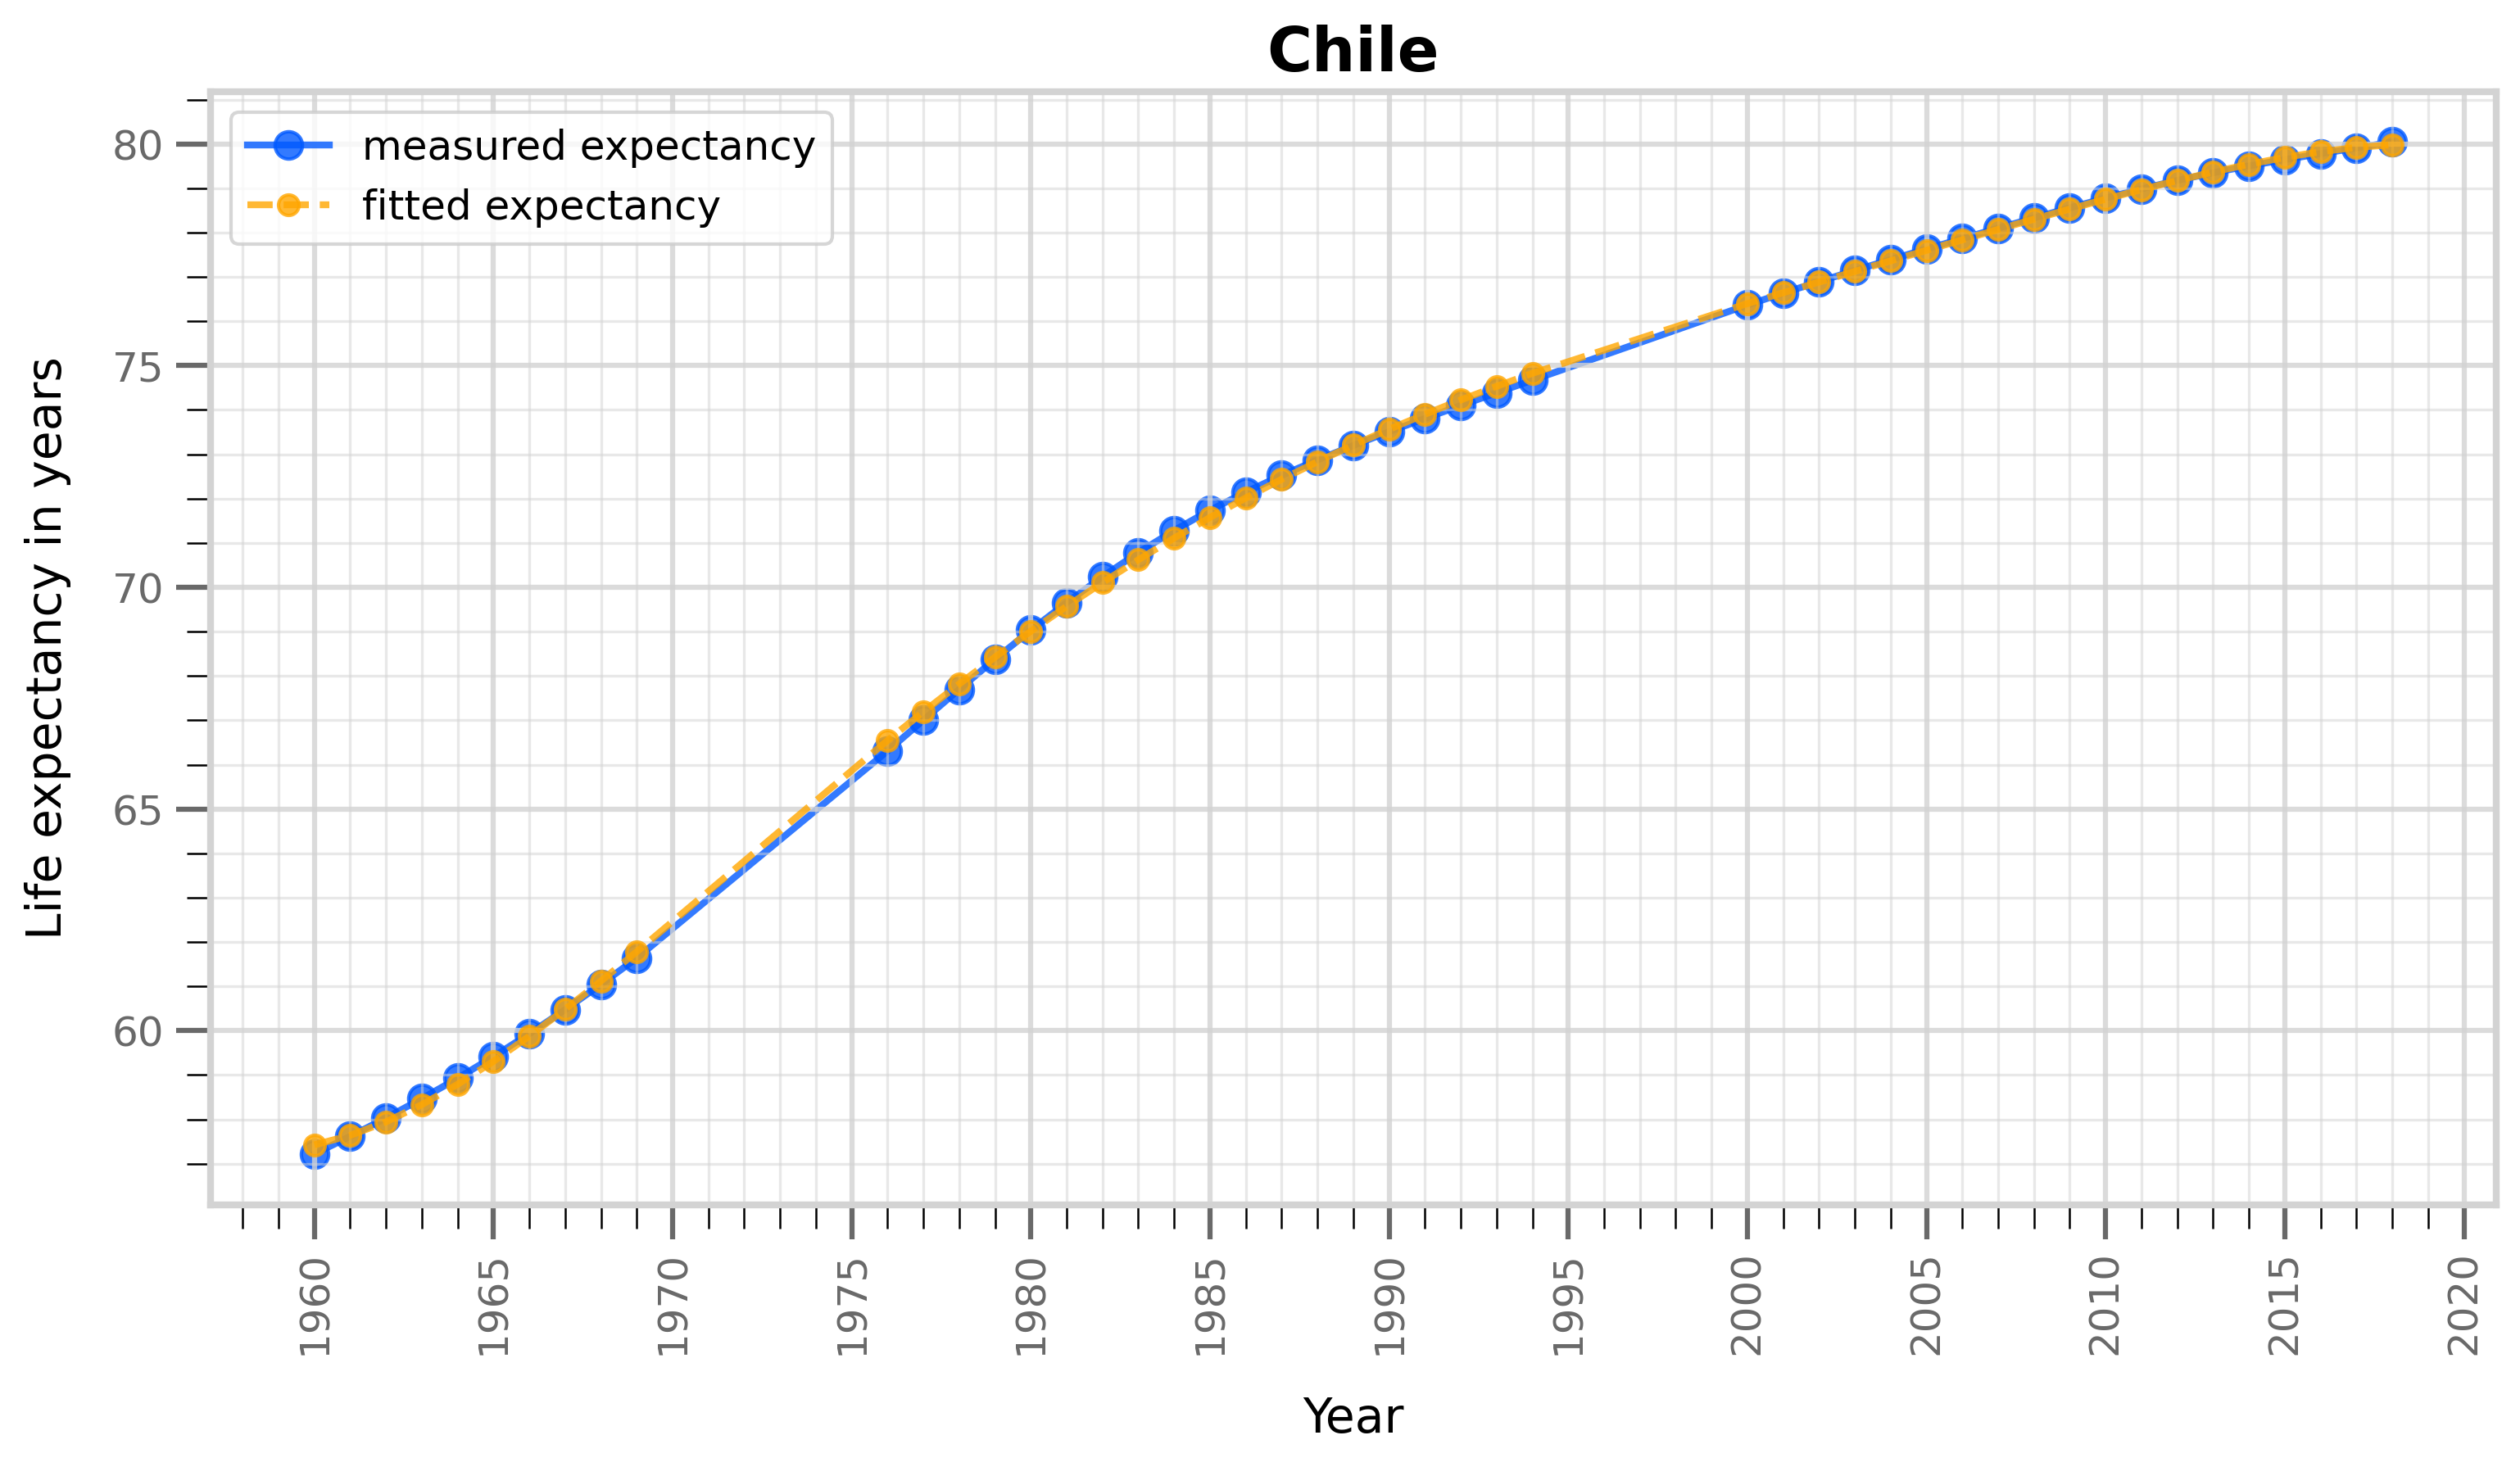

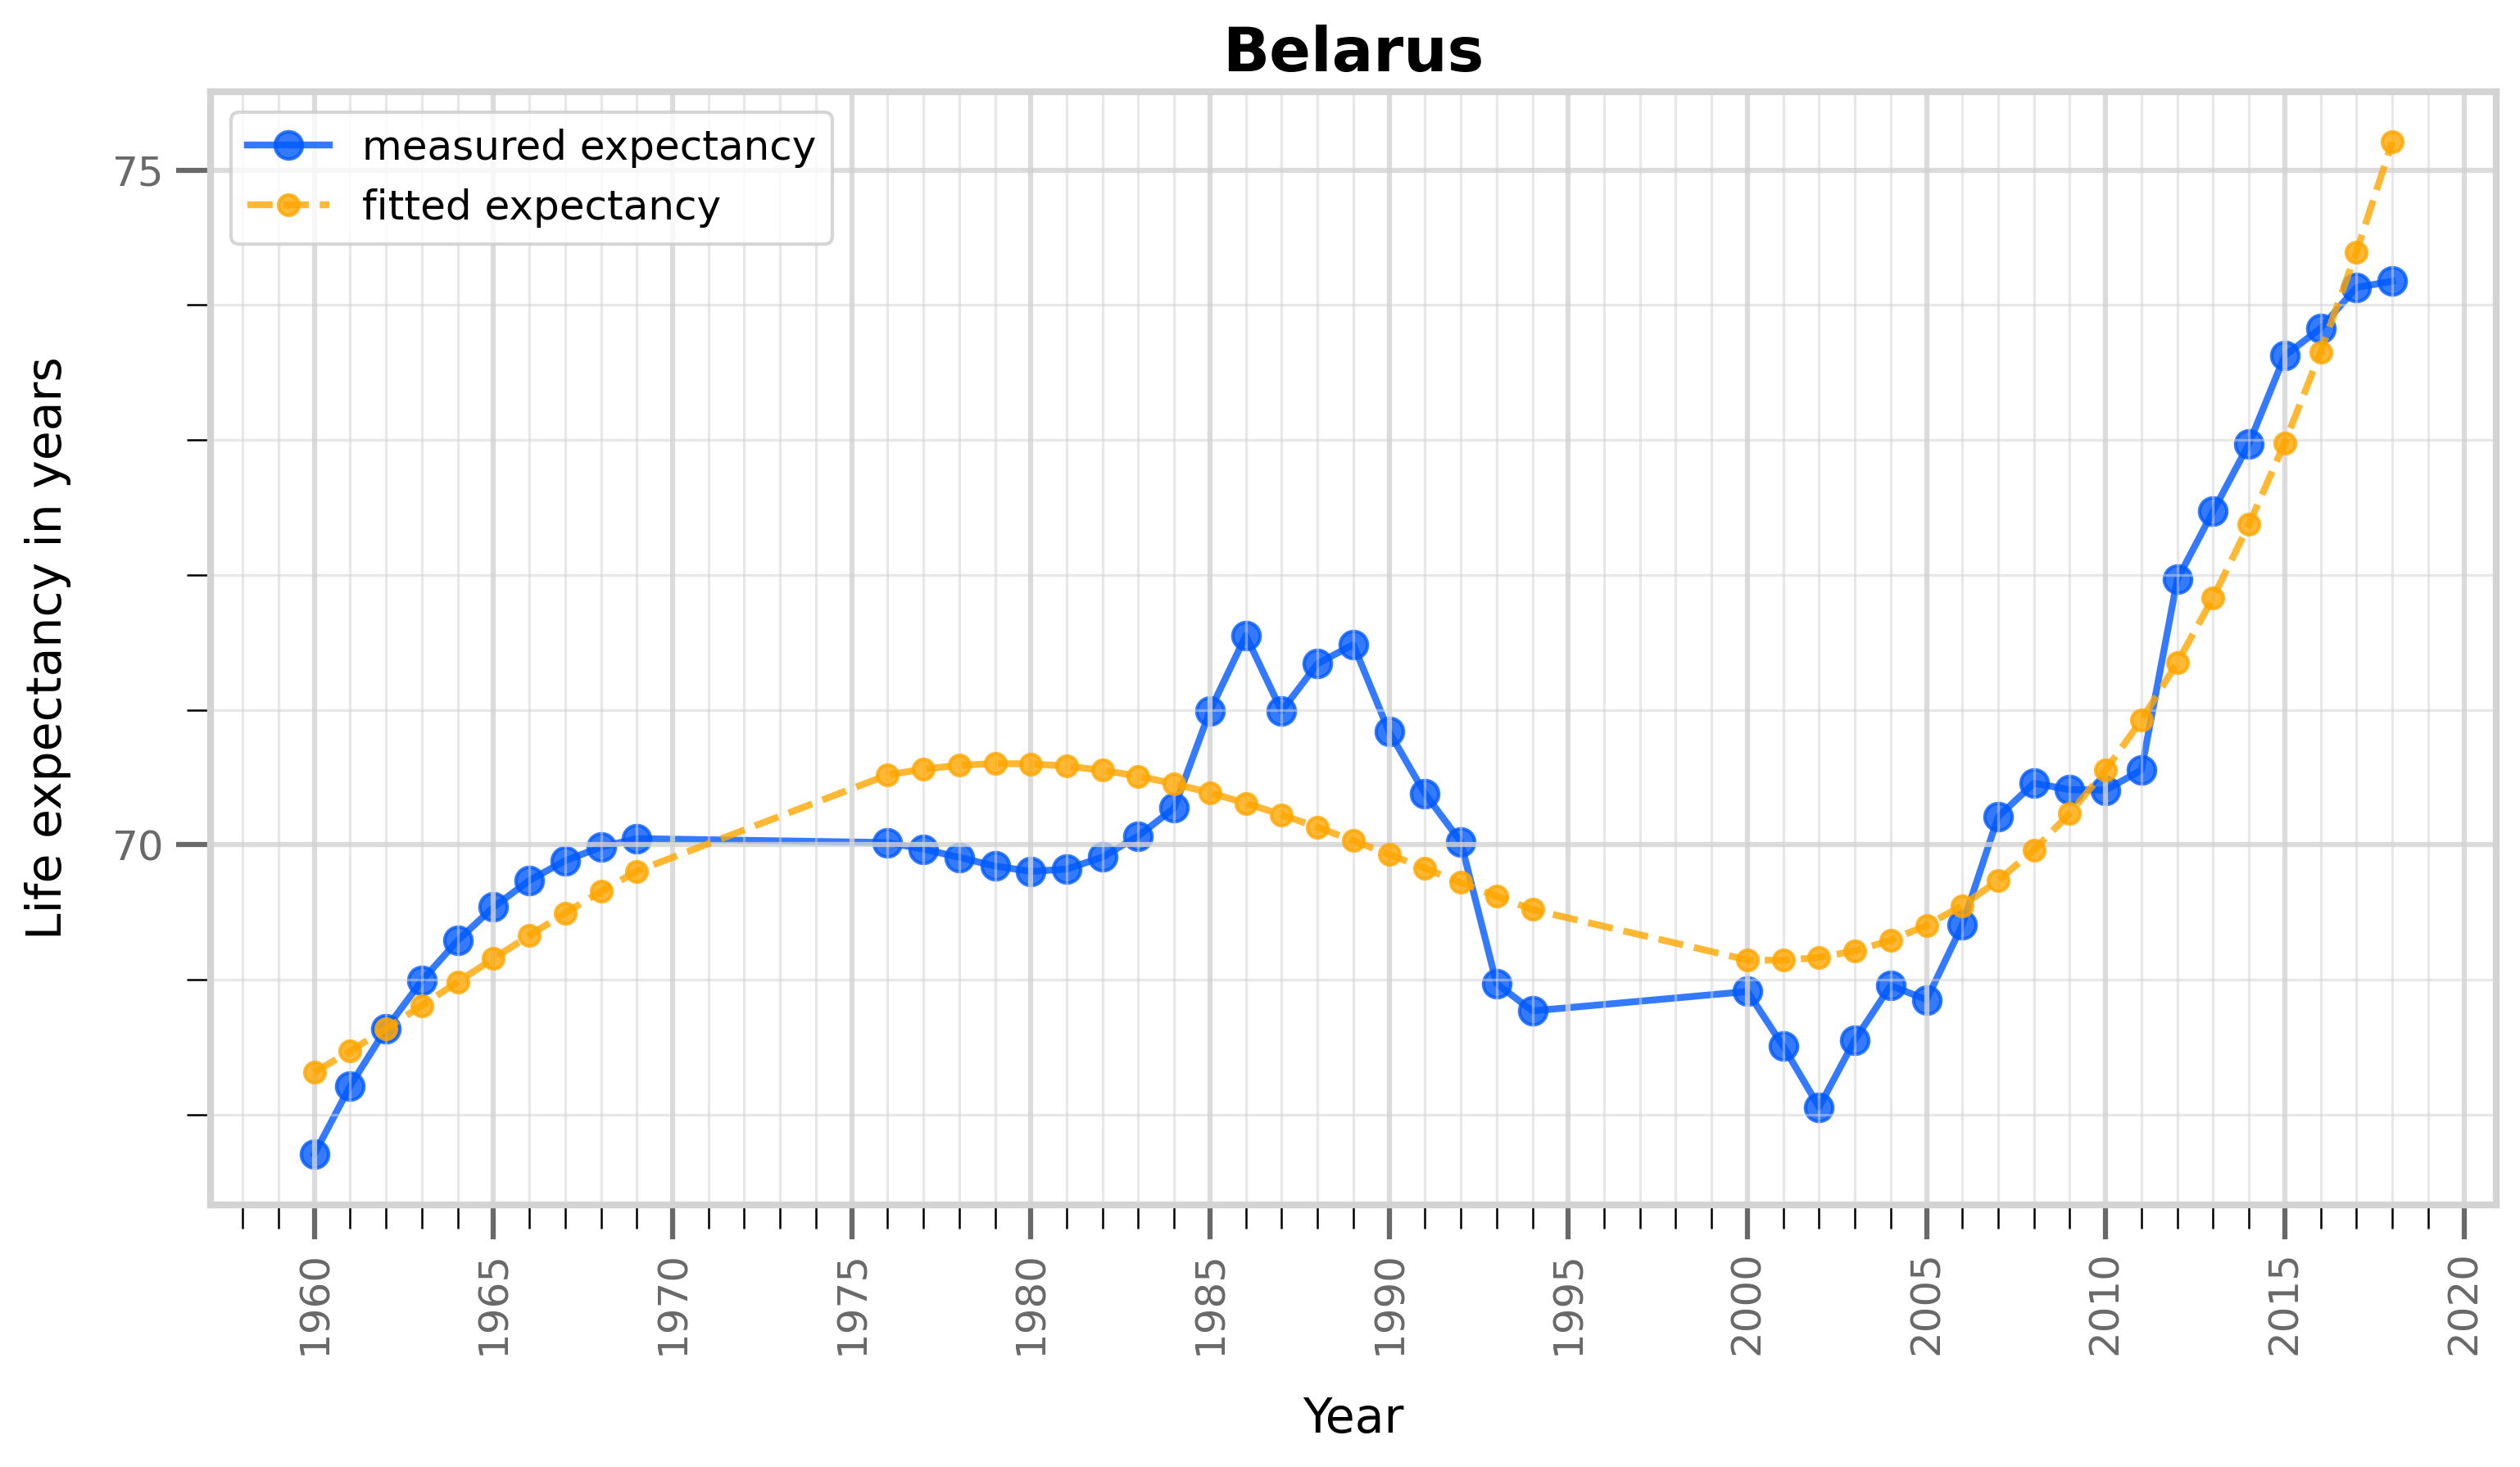

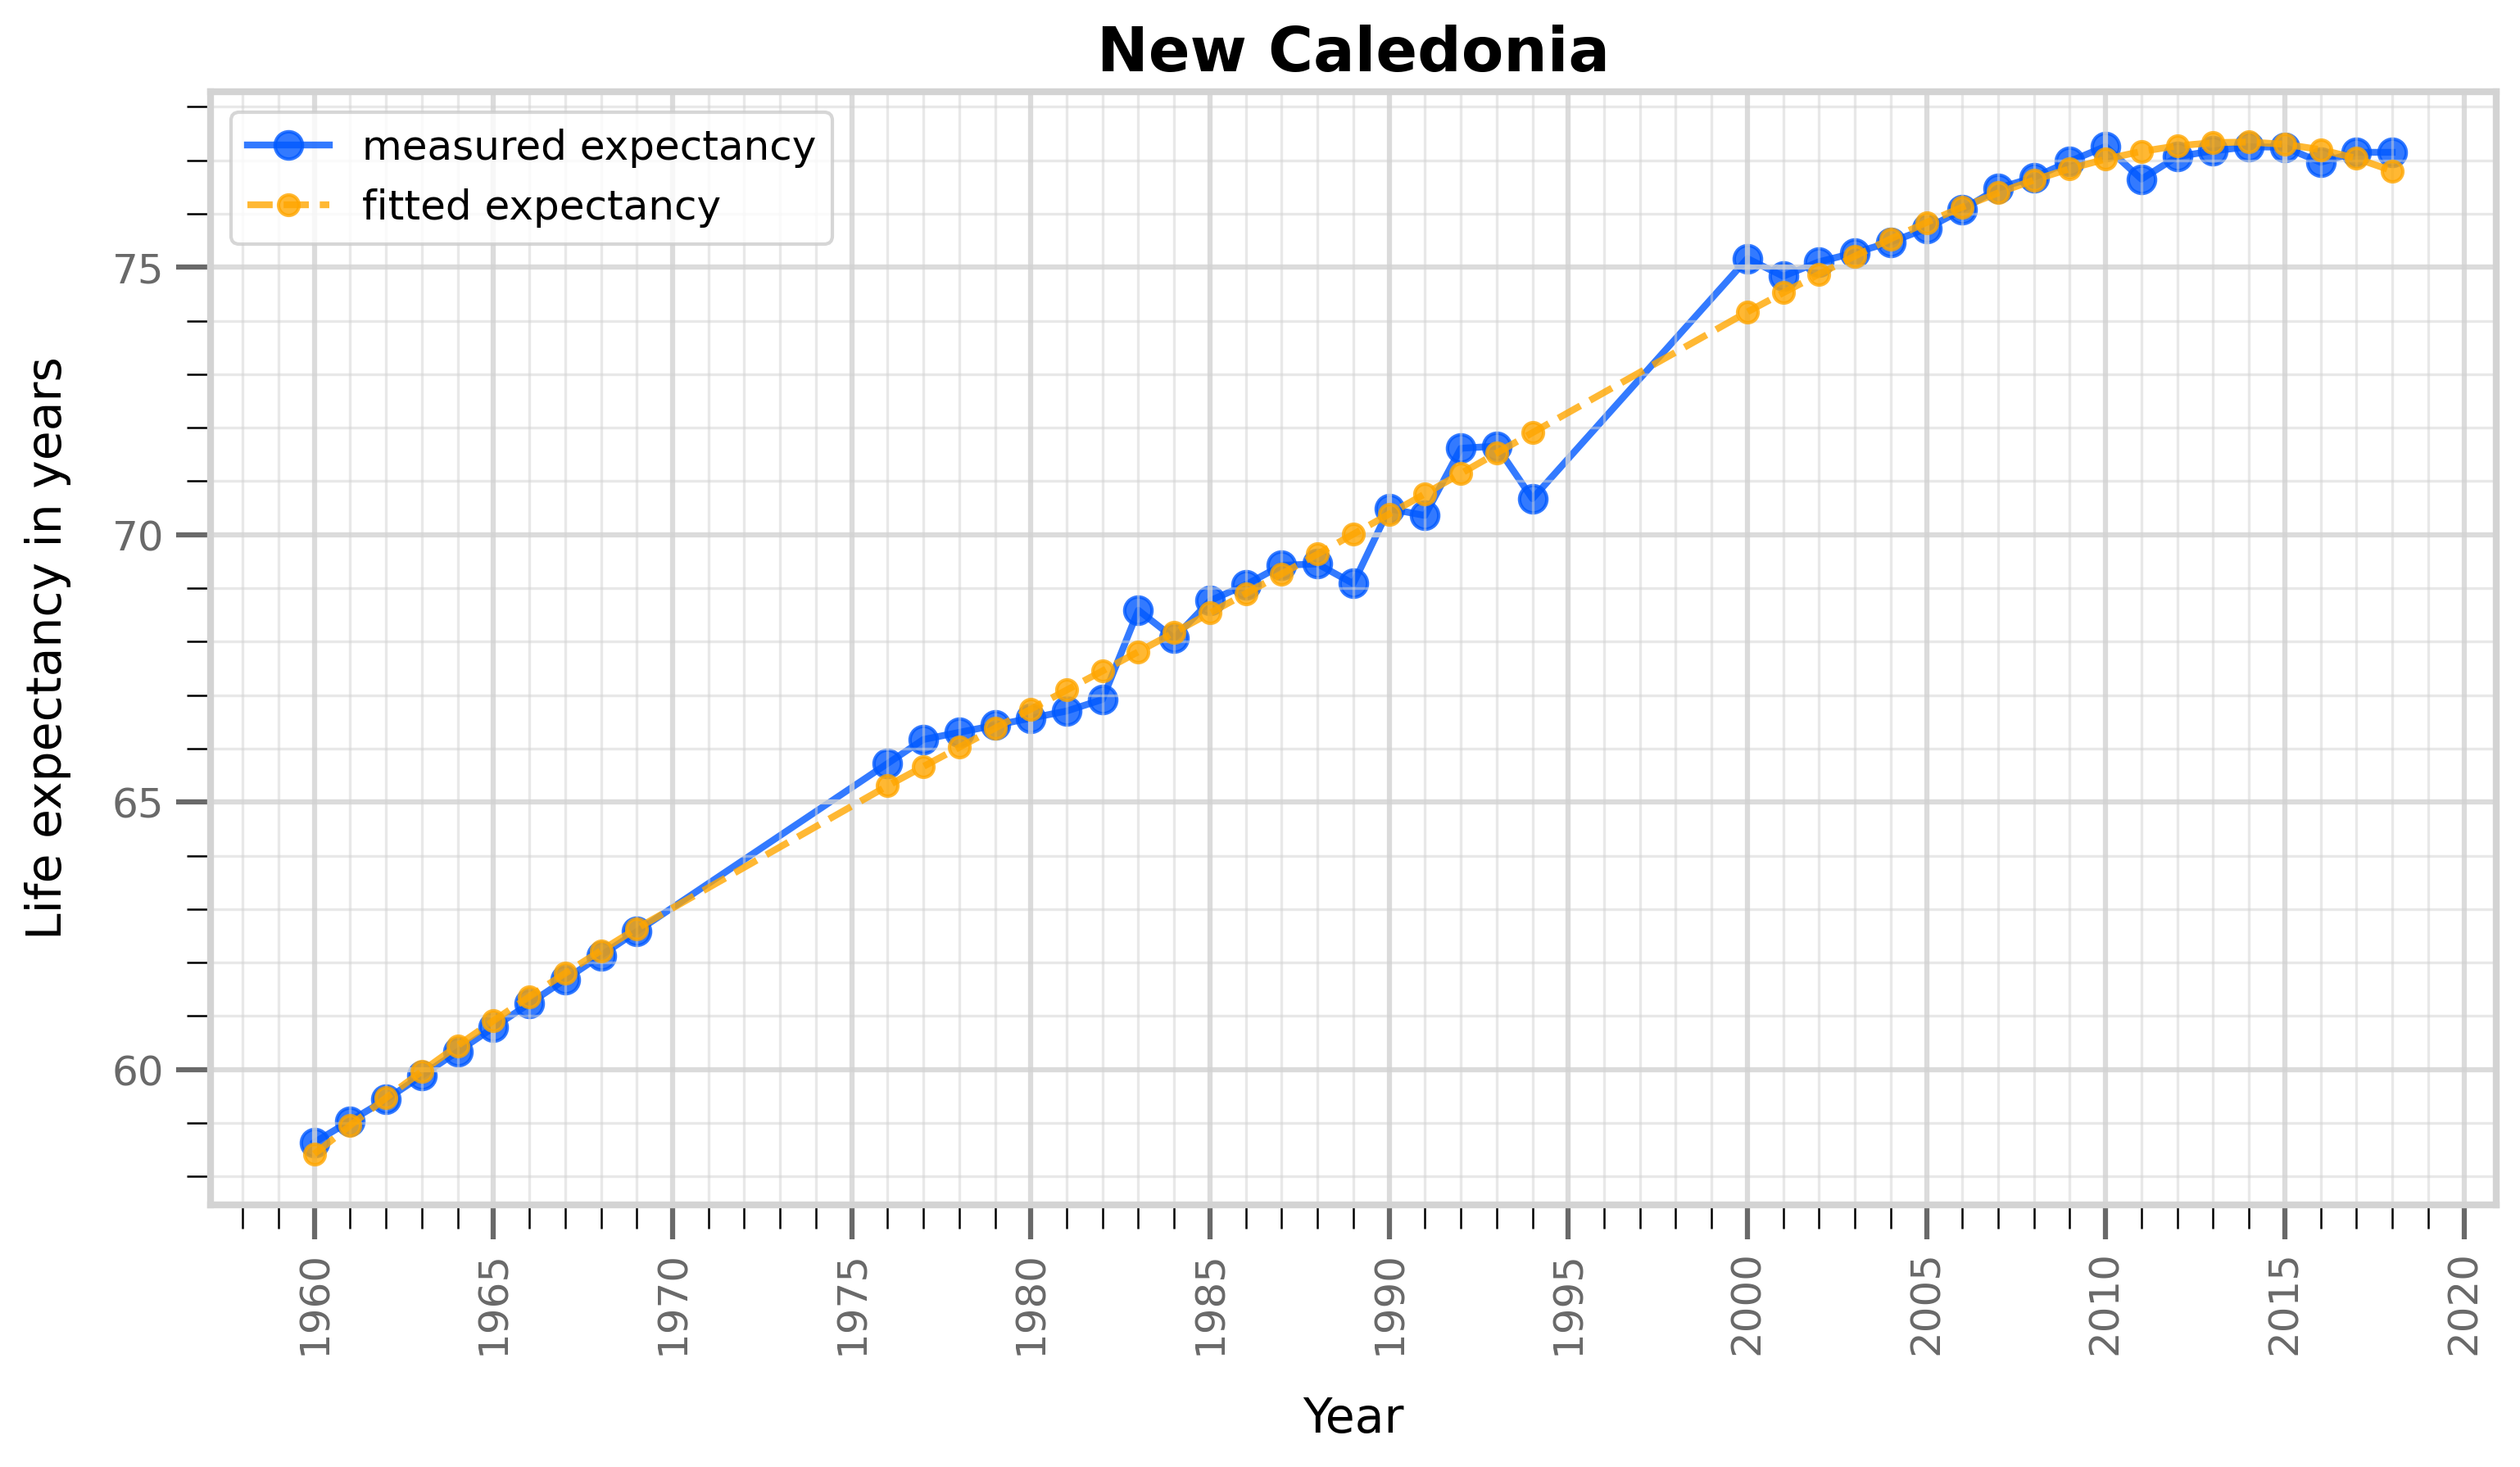

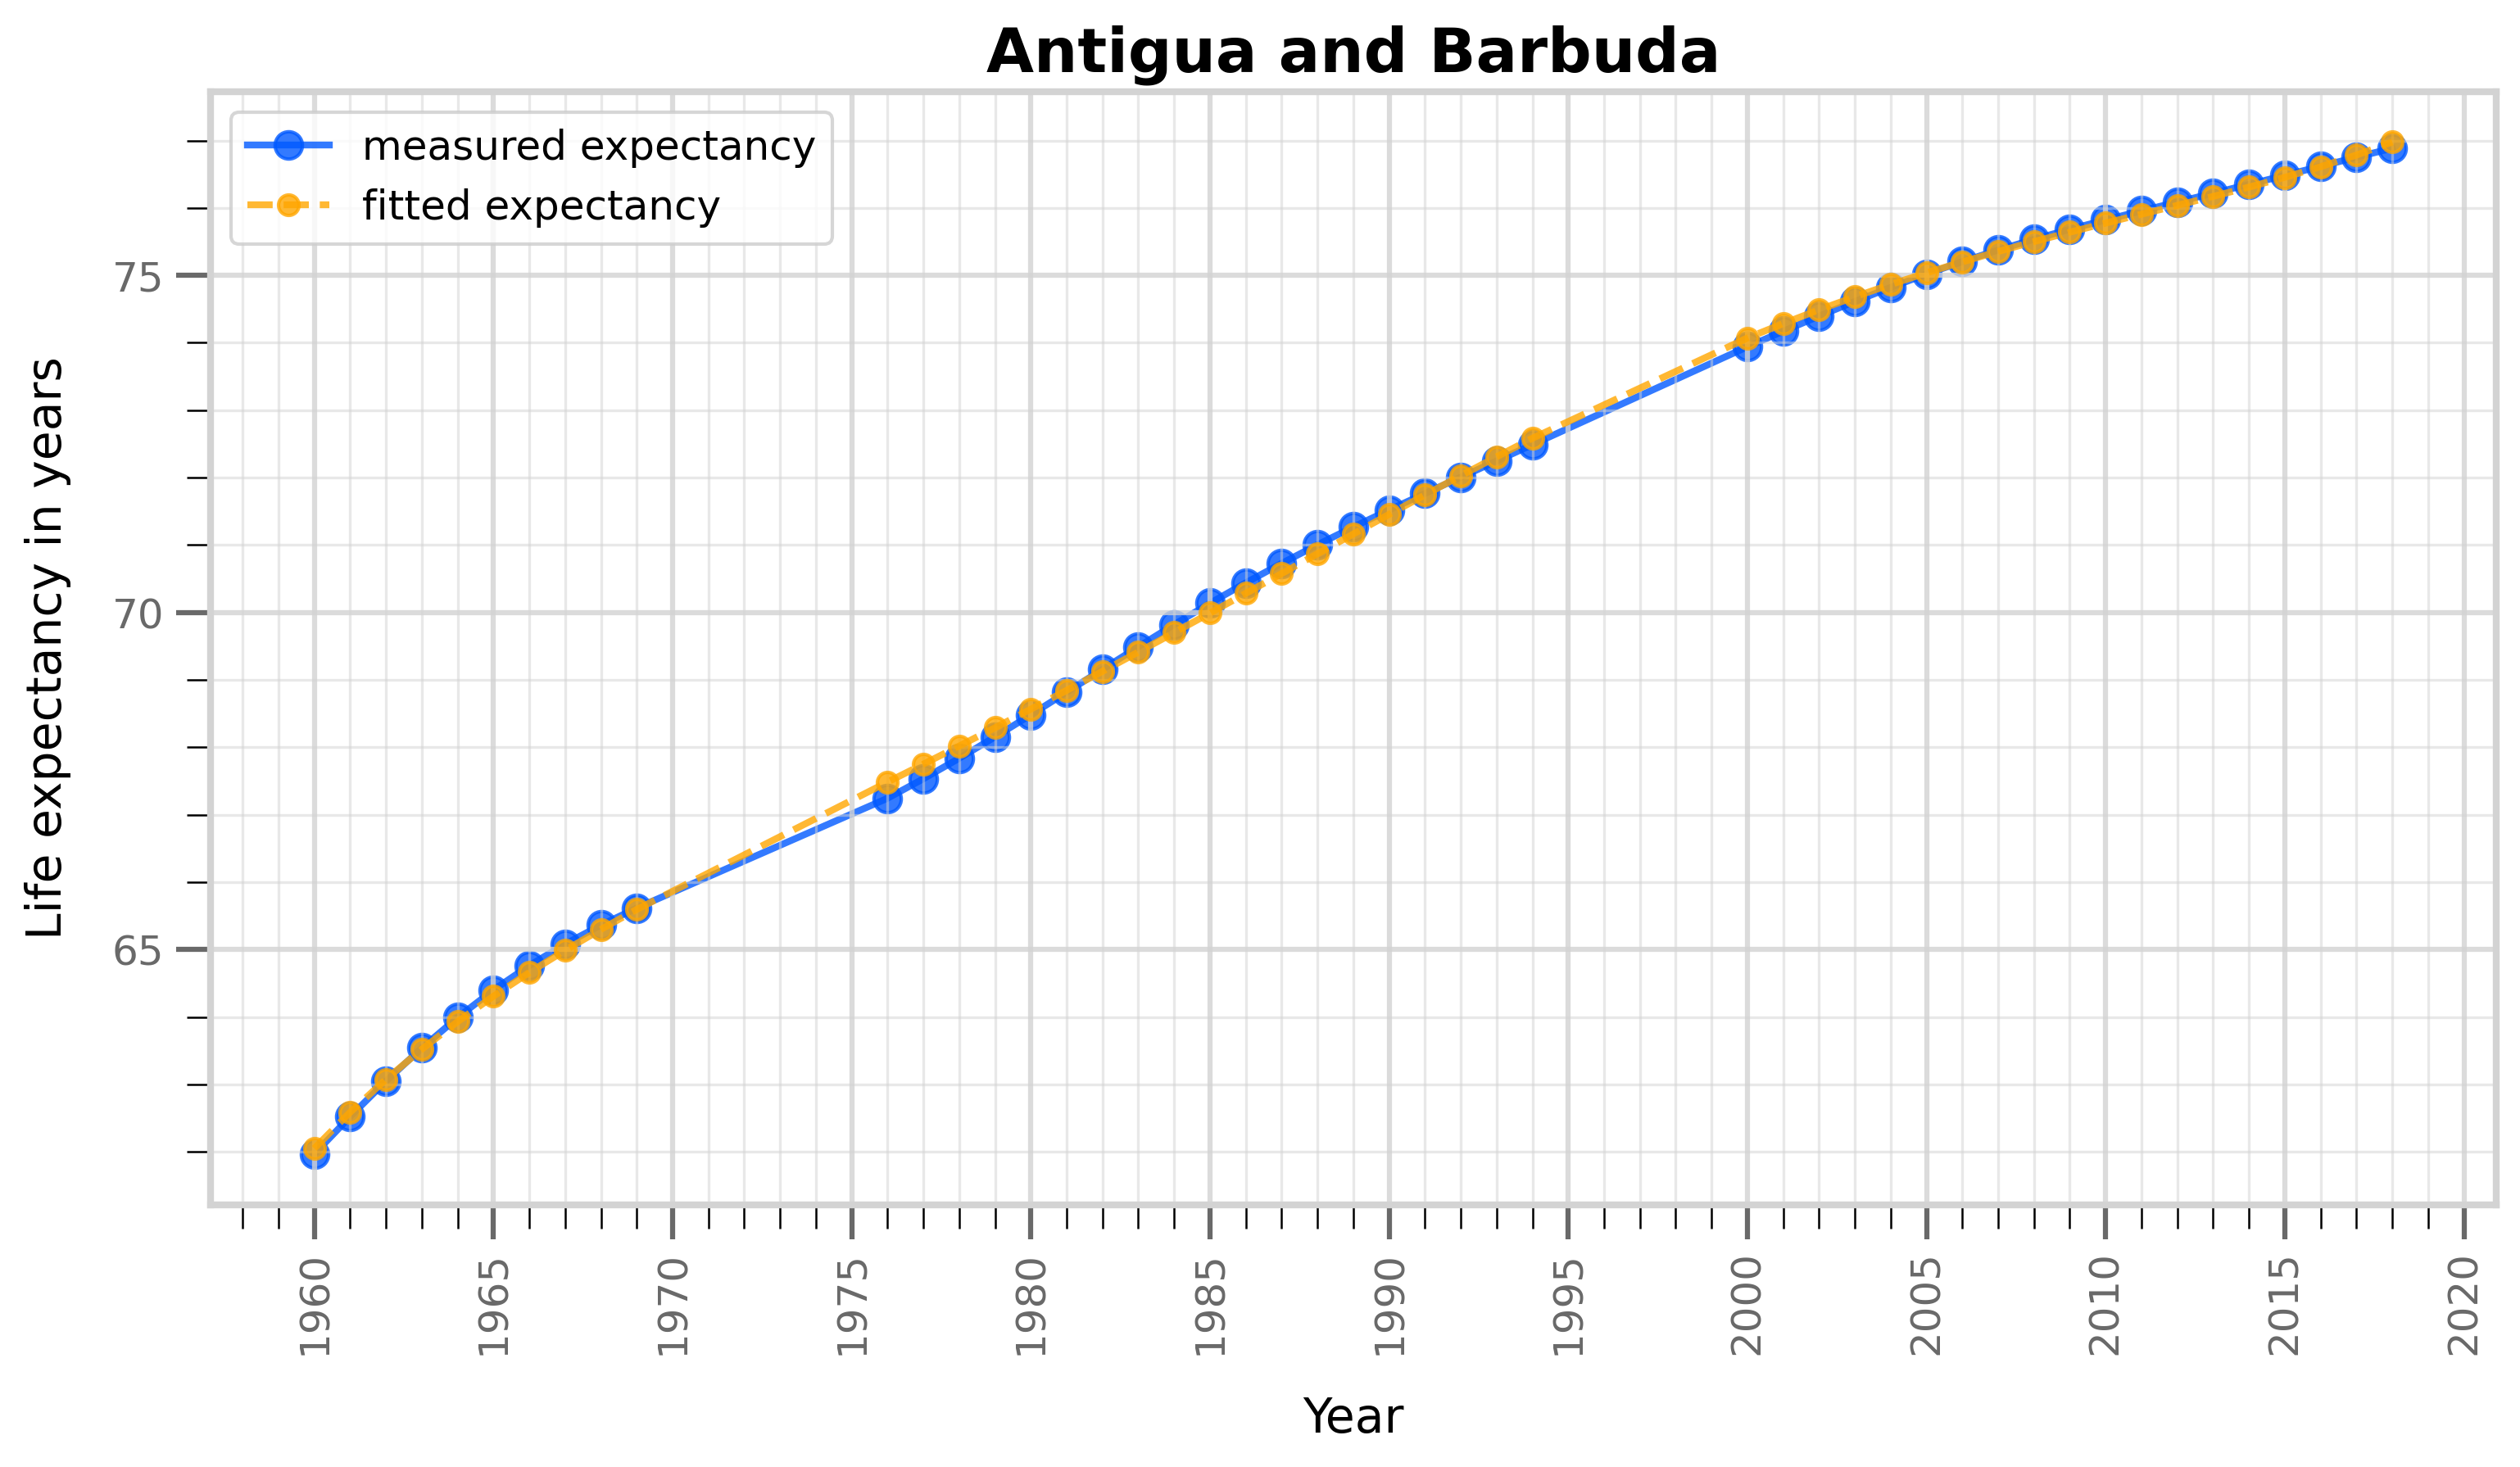

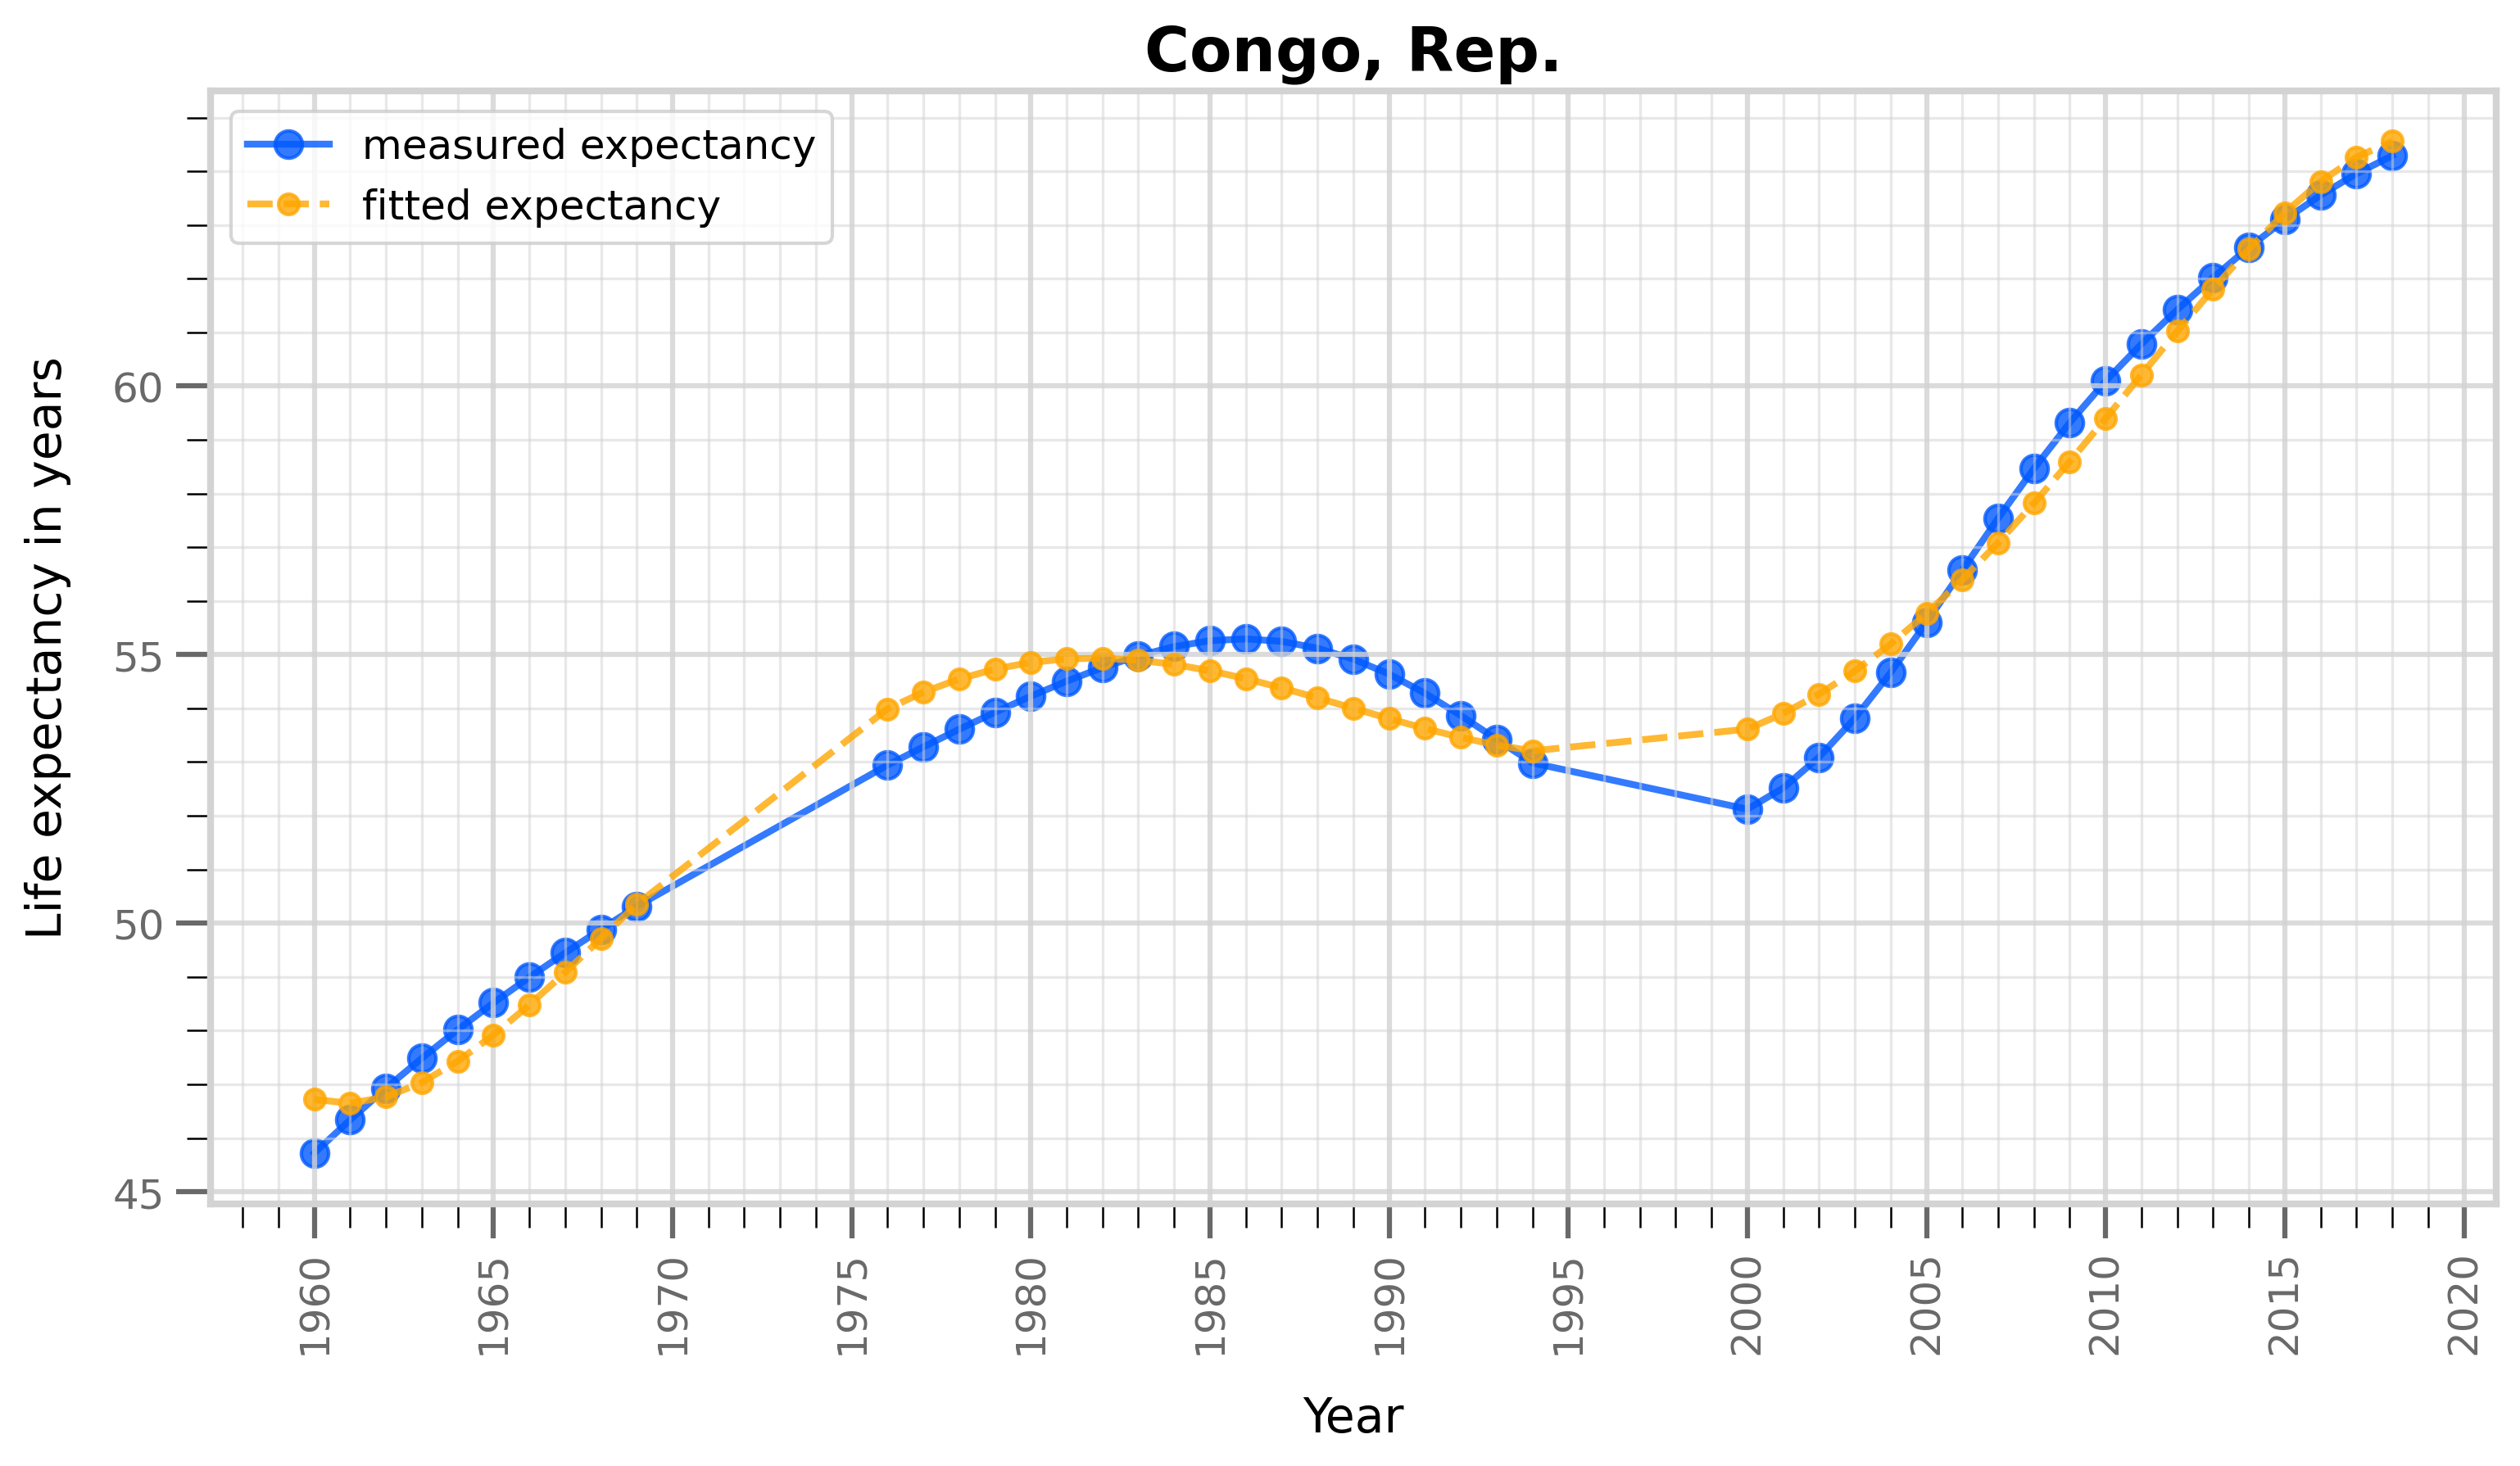

In [80]:

def plot_two_overlain_data_sets(title, x_label, y_label, y1_legend, y2_legend,
                                x1_values, y1_values, x2_values, y2_values):
    check_single_argument(title, str, "a title, to show above the diagram")
    check_single_argument(x_label, str, "an x-axis label, to show below the diagram")
    check_single_argument(y_label, str, "a y-axis label, to show left of the diagram")
    check_single_argument(y1_legend, str, "a description of the 1st data set, for the legend")
    check_single_argument(y2_legend, str, "a description of the 2nd data set, for the legend")

    check_list_argument(x1_values, int, "x-values, of the 1st data set")
    check_list_argument(y1_values, float, "y-values, of the 1st data set")
    check_list_argument(x2_values, int, "x-values, of the 2nd data set")
    check_list_argument(y2_values, float, "y-values, of the 2nd data set")

    plt.figure(dpi=300, figsize=(12, 6))                # diagram resolution and size
    plt.rc('axes', edgecolor="lightgray", linewidth=2)  # frame around diagram

    plt.grid(which='major', alpha=0.8, color='lightgray', linestyle='-', linewidth=1.5)
    plt.grid(which='minor', alpha=0.5, color='lightgray', linestyle='-')
    plt.grid(True)

    all_x_values = x1_values + x2_values

    plt.tick_params(axis='both', colors='dimgray', labelsize=12, length=10, width=1.5)
    plt.xticks(np.arange(min(all_x_values), max(all_x_values) + 5, 5), rotation='90')
    plt.yticks(np.arange(0, max(y1_values + y2_values), 5))
    plt.tick_params(which='minor', length=7)
    plt.minorticks_on()

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, labelpad=12)
    plt.ylabel(y_label, fontsize=14, labelpad=12)

    plt.plot(x1_values, y1_values, label=y1_legend, color=(0, 0.35, 1, 0.8), linewidth=2,
             linestyle="solid", marker="o", markersize=8, zorder=1)
    plt.plot(x2_values, y2_values, label=y2_legend, color=(1, 0.65, 0, 0.8), linewidth=2,
             linestyle="dashed", marker="o", markersize=6, zorder=2)
    plt.legend(loc='upper left', fontsize=12)

    plt.show()


def data_row_value_lists(data_frame: pd.DataFrame, column_name: str):
    check_single_argument(data_frame, pd.DataFrame, "a data frame")
    check_single_argument(column_name, str, "a data frame column name")

    row_value_lists = []  # list of lists

    for index in range(len(data_frame)):
        row = data_frame.iloc[index]

        row_value_lists.append(
            row.loc[column_name:].values.tolist()  # values from given column to end of row
        )

    return row_value_lists


def polynomially_fitted_value_lists(x_values, lists_of_y_values, degree):
    check_list_argument(x_values, int, "x-values of a data set")
    check_list_of_lists_argument(lists_of_y_values, float, "y-values of data sets")
    check_single_argument(degree, int, "a degree for the created polynomial")

    fitted_y_value_lists = []  # list of lists

    for y_values in lists_of_y_values:
        coefficients = np.polyfit(x_values, y_values, degree)
        polynomial   = np.poly1d(coefficients)

        fitted_y_value_lists.append(
            polynomial(x_values).tolist()
        )

    return fitted_y_value_lists


# suppress warnings about polynomial fit quality
warnings.simplefilter('ignore', np.RankWarning)

# years from 1960 to 2018. without 1970 to 1975 and 1995 to 1999.
partial_years           = list(range(1960, 1970)) + list(range(1976, 1995)) + list(range(2000, 2019))

random_countries        = expectancy_dataframe.sample(5)
expectancy_lists        = data_row_value_lists(random_countries, "1960")
fitted_expectancy_lists = polynomially_fitted_value_lists(partial_years, expectancy_lists, 6)

# plot fitted expectancies over measured expectancies
for country_index in range(len(random_countries)):
    plot_two_overlain_data_sets(
        random_countries.iloc[country_index].loc["Country_Name"],
        "Year", "Life expectancy in years", "measured expectancy", "fitted expectancy",
        partial_years, expectancy_lists[country_index],
        partial_years, fitted_expectancy_lists[country_index]
    )

### Task 3
**Goals**: Interpolate the life expectancy, of the previously taken country samples,
including the missing years from 1970 to 1975 and from 1995 to 1999. 

Subsequently, plot five graphs which overlay the interpolated life expectancy data and the 
original life expectancy data. 

And finally, display a data frame, in order to report the missing years' interpolated life 
expectancies by country.

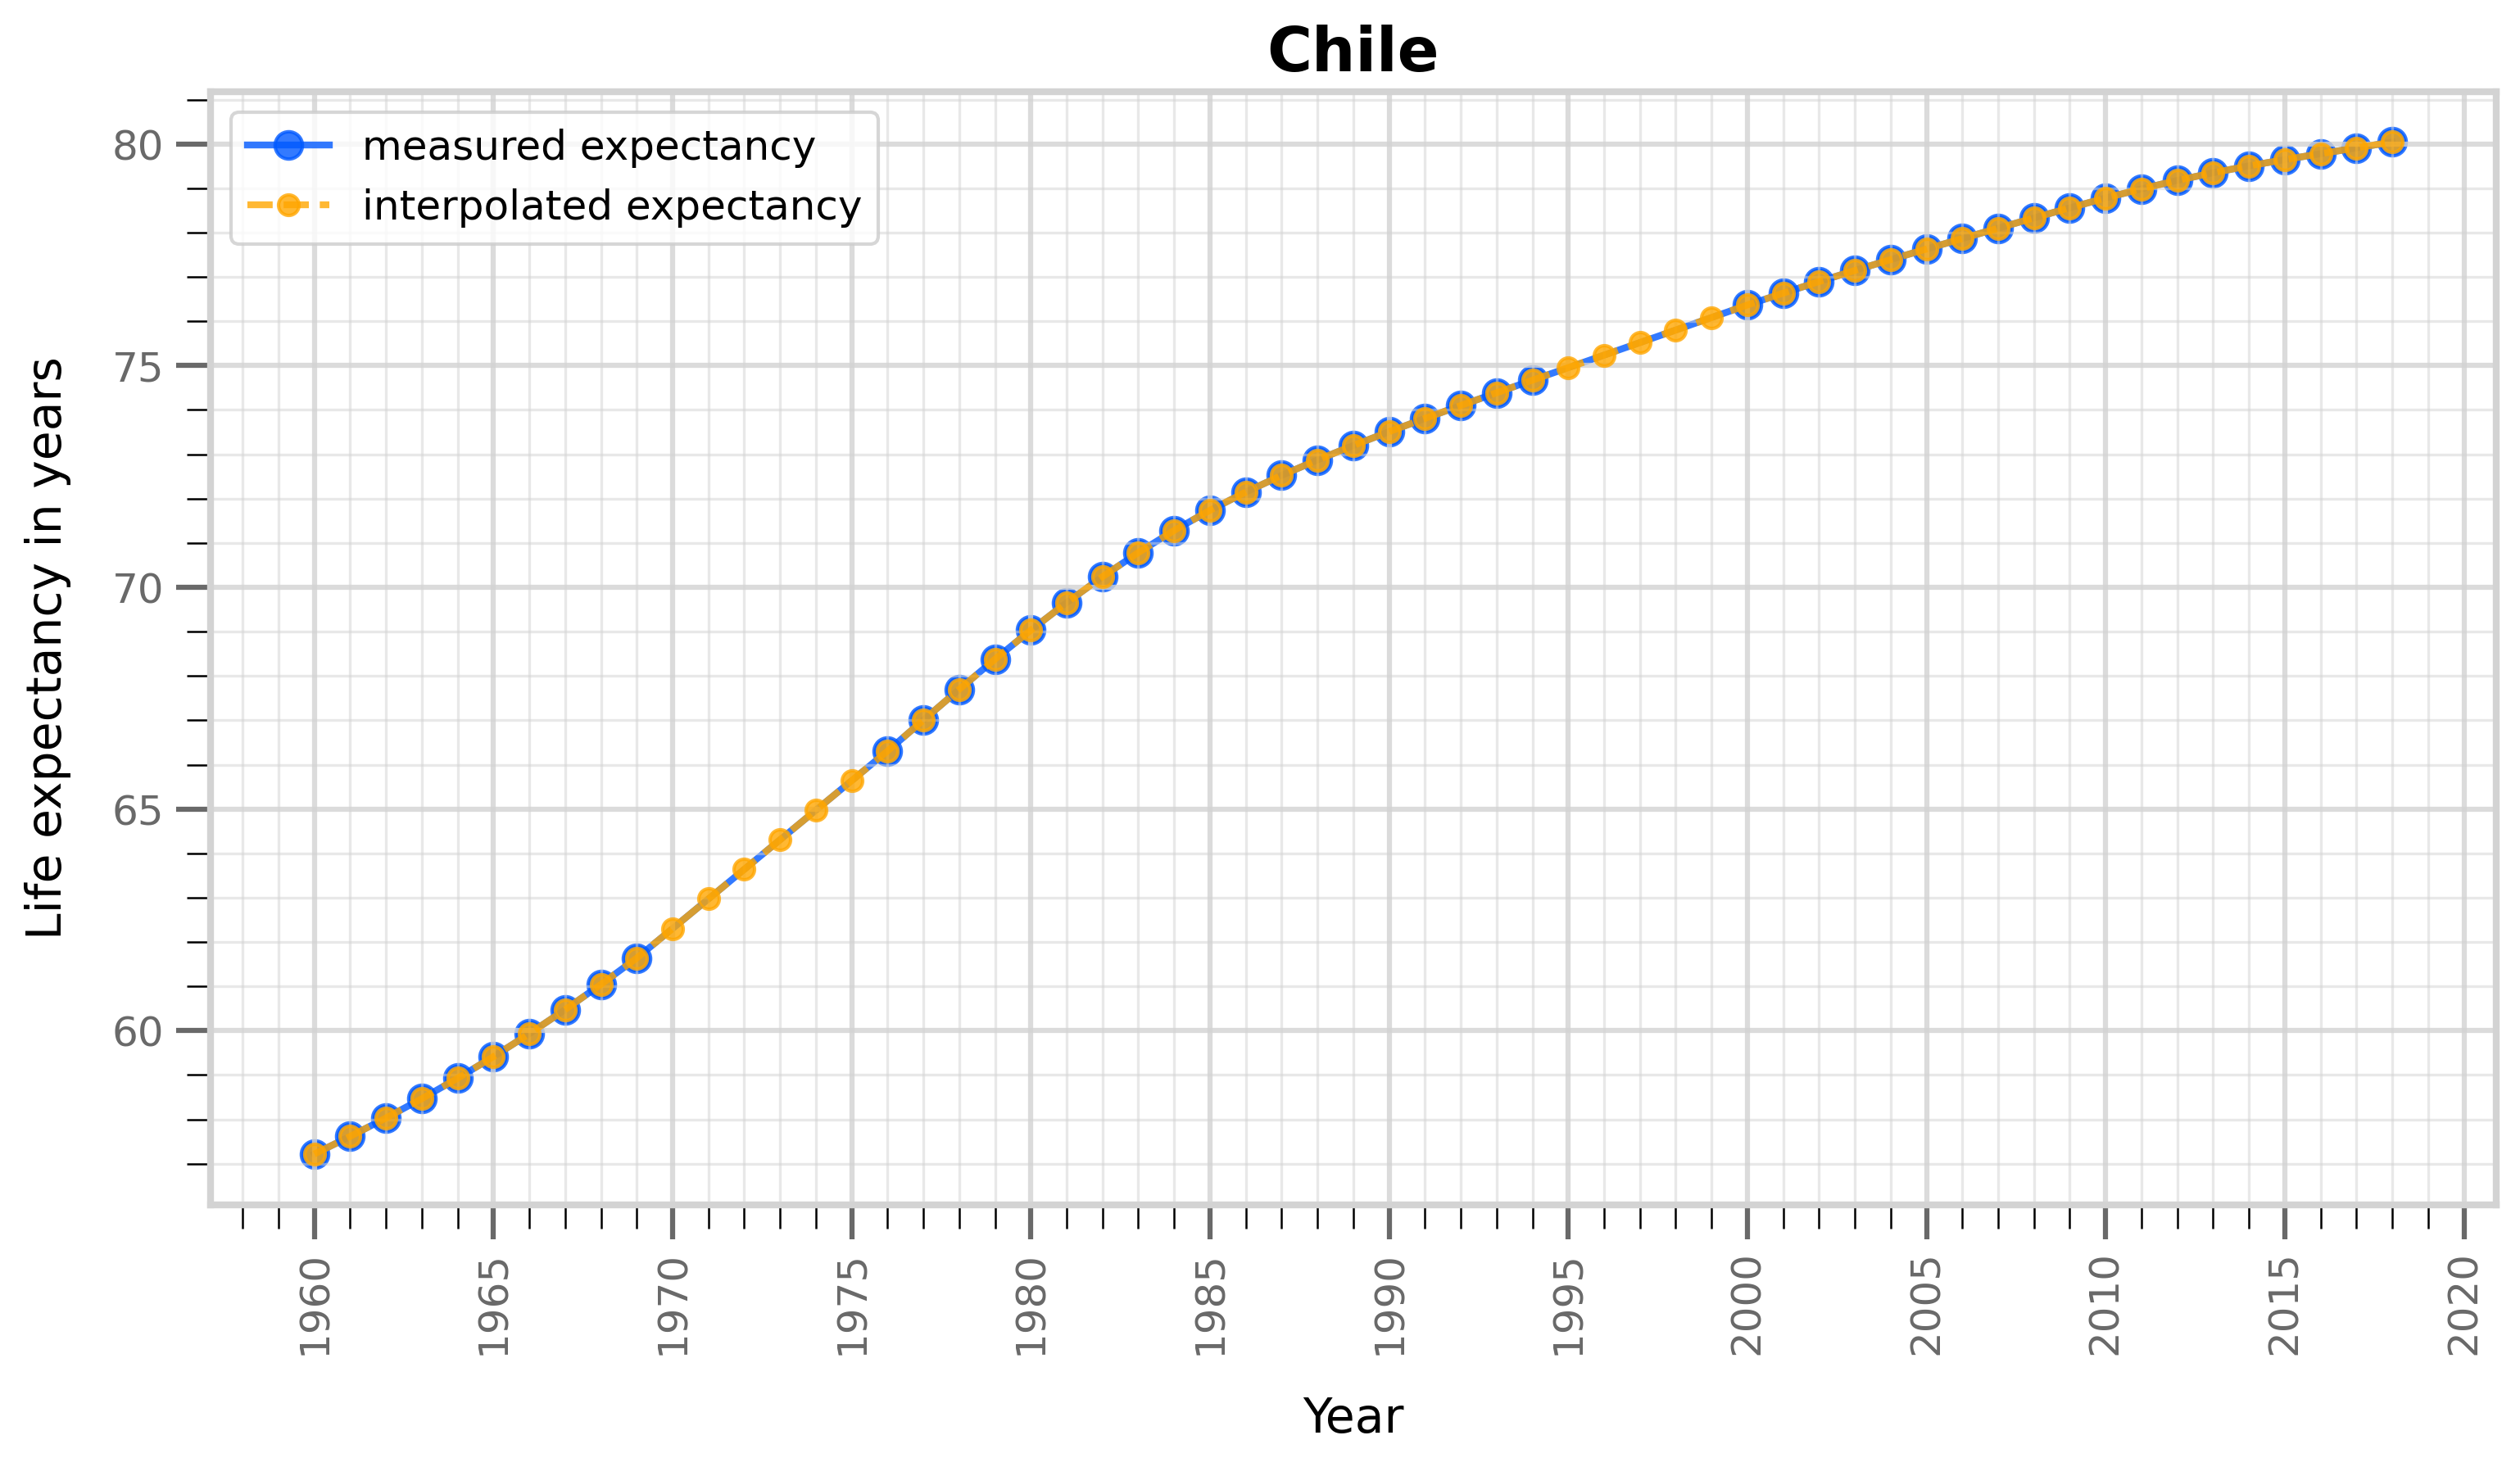

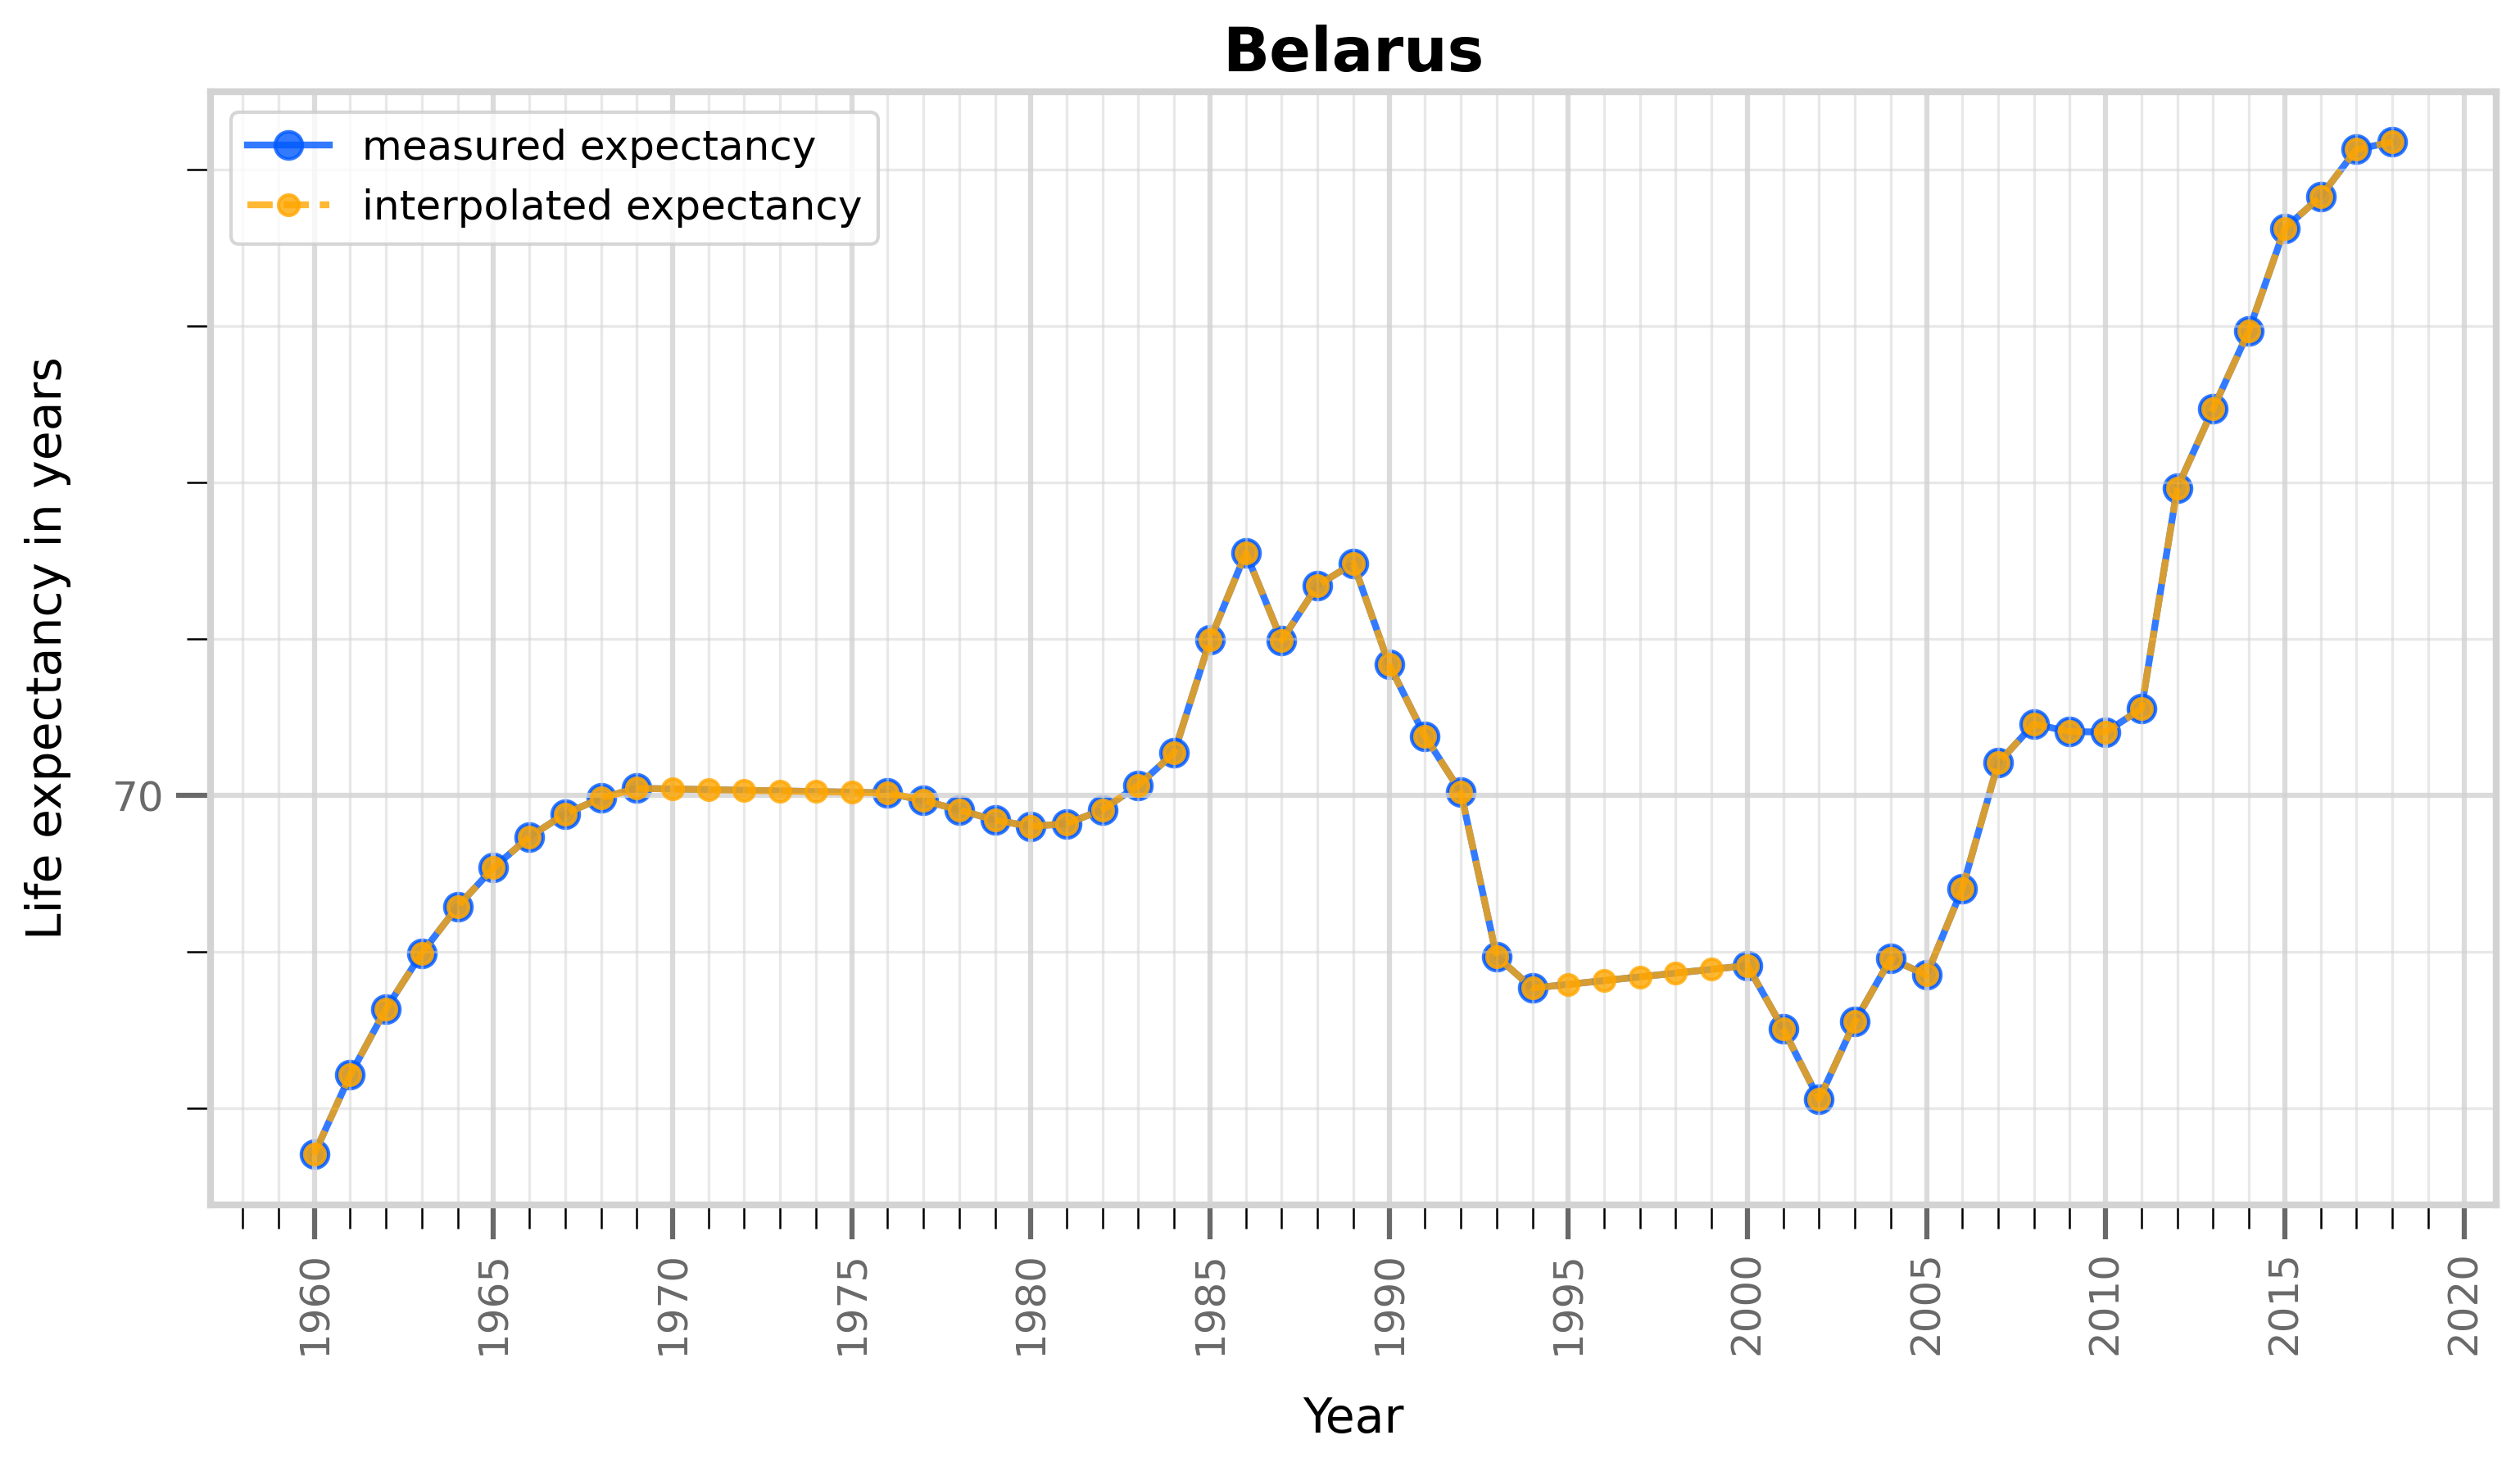

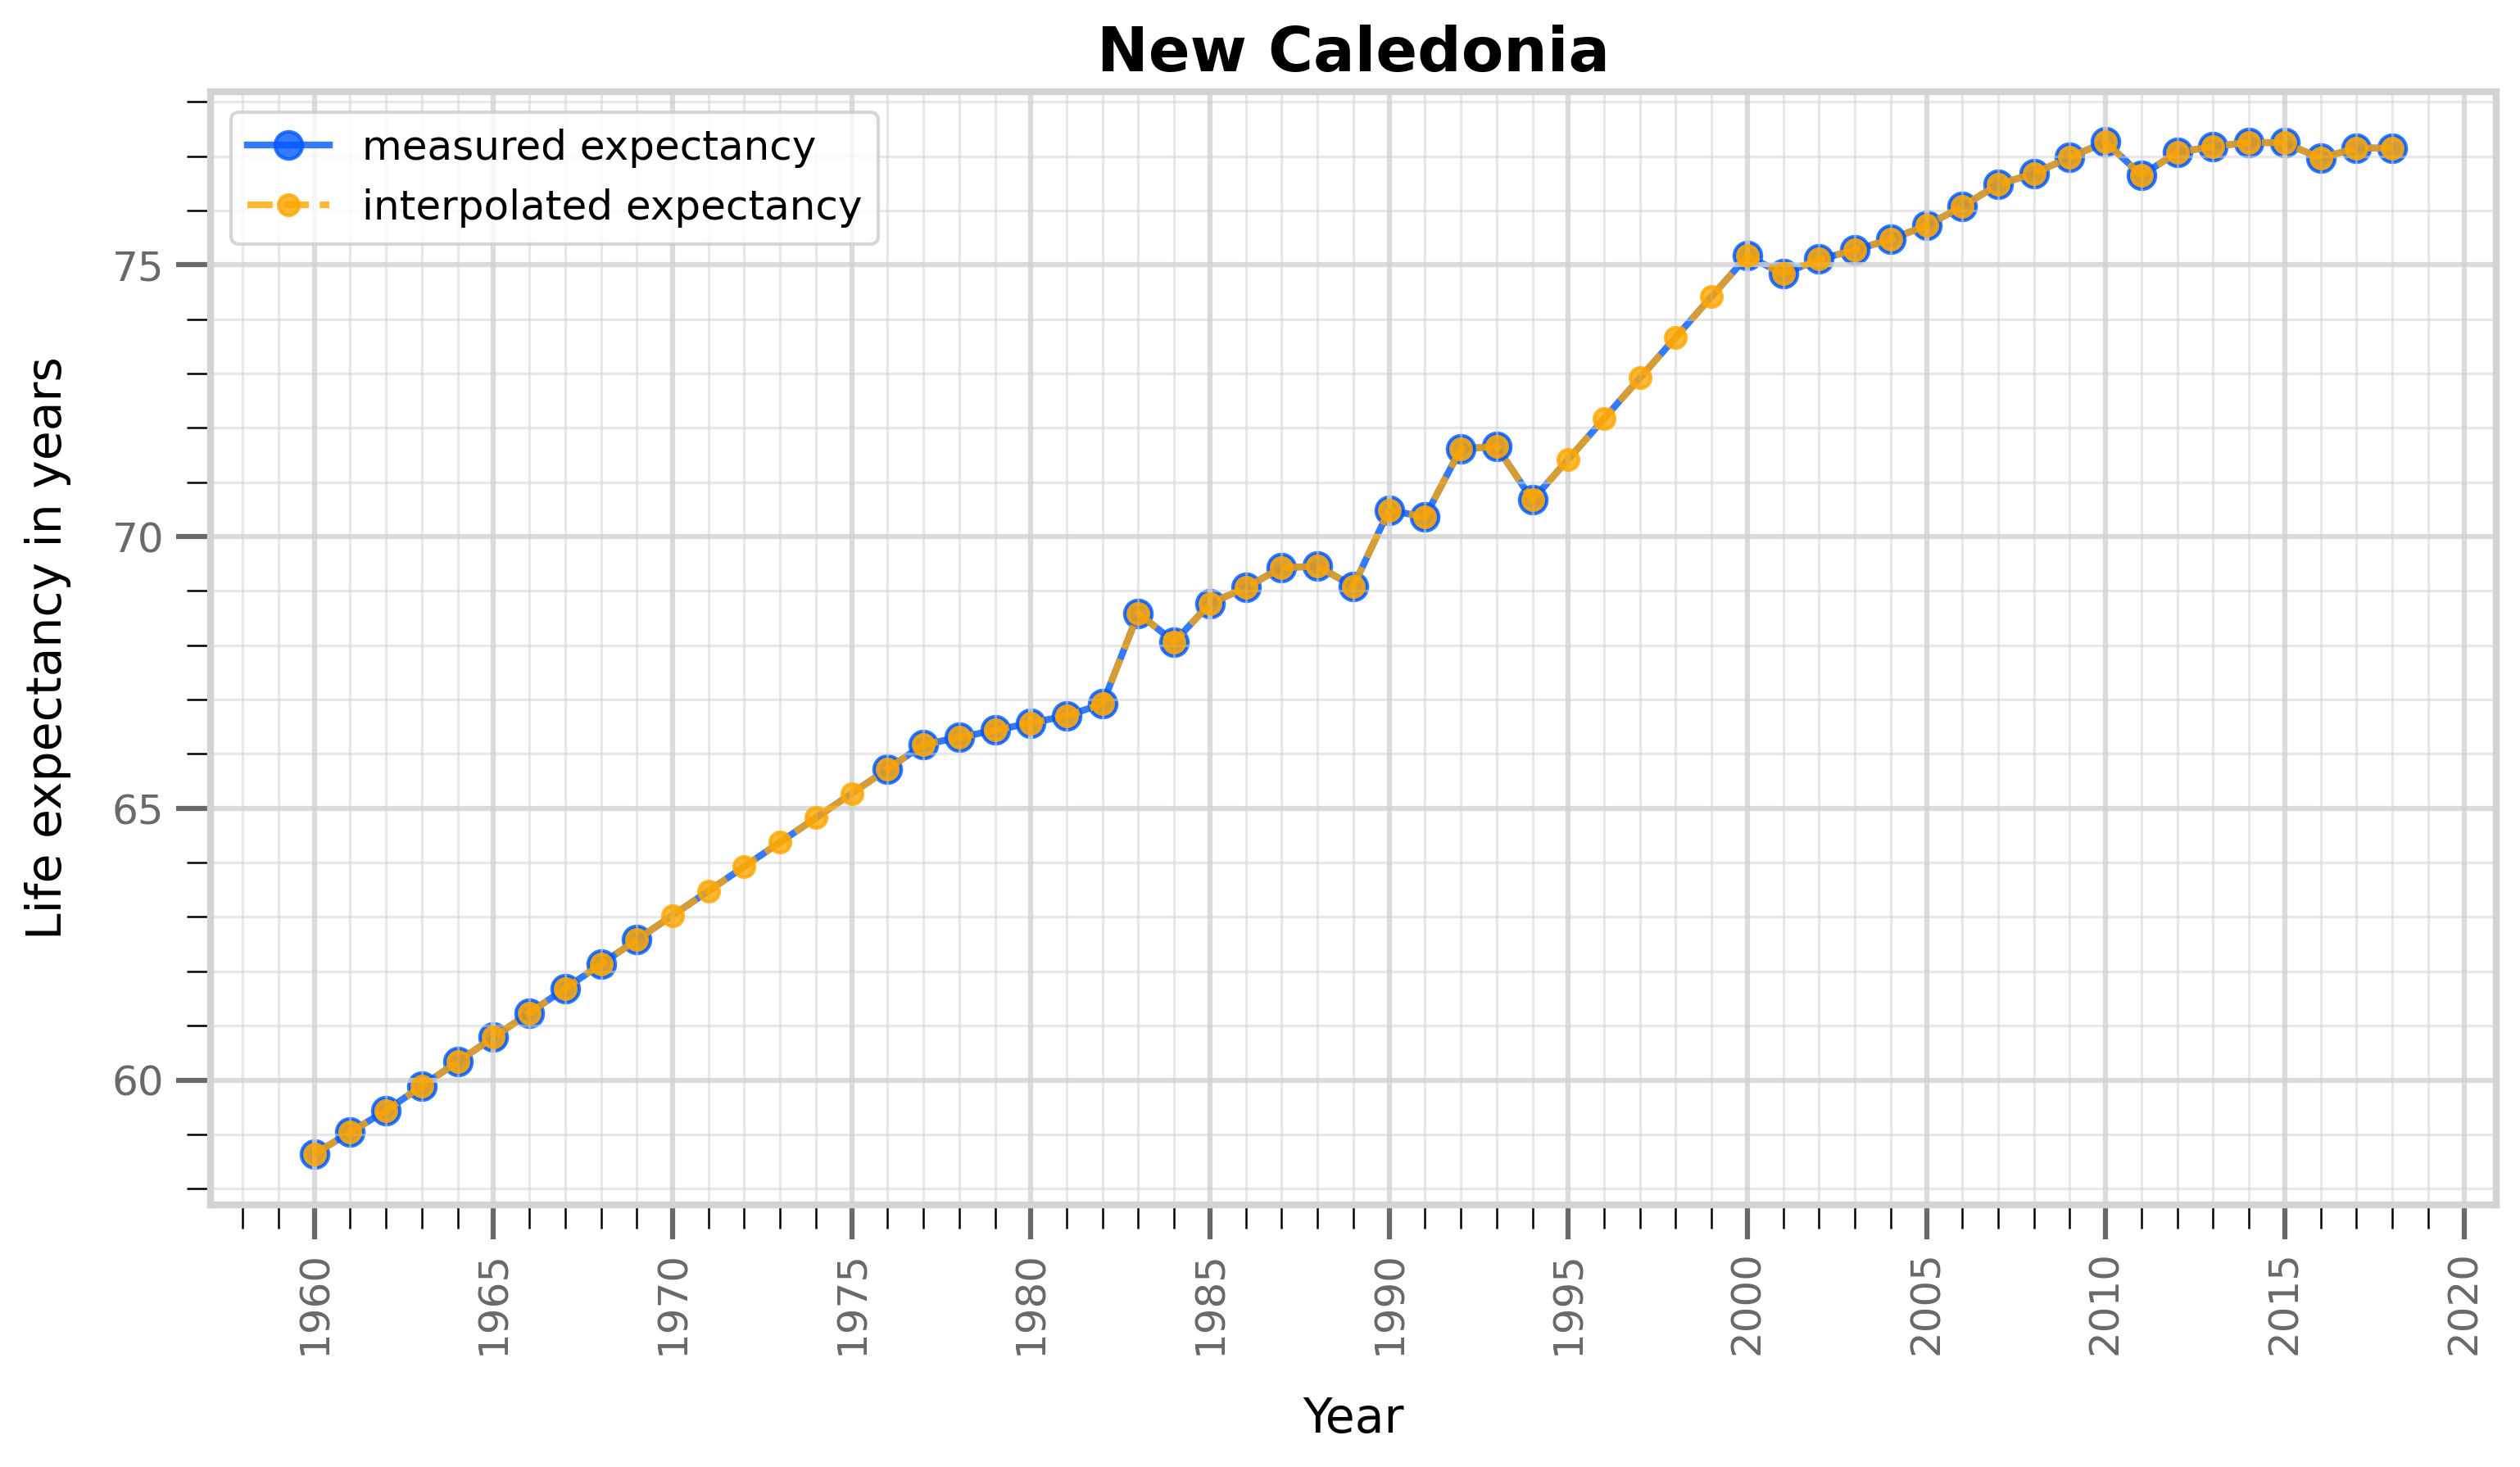

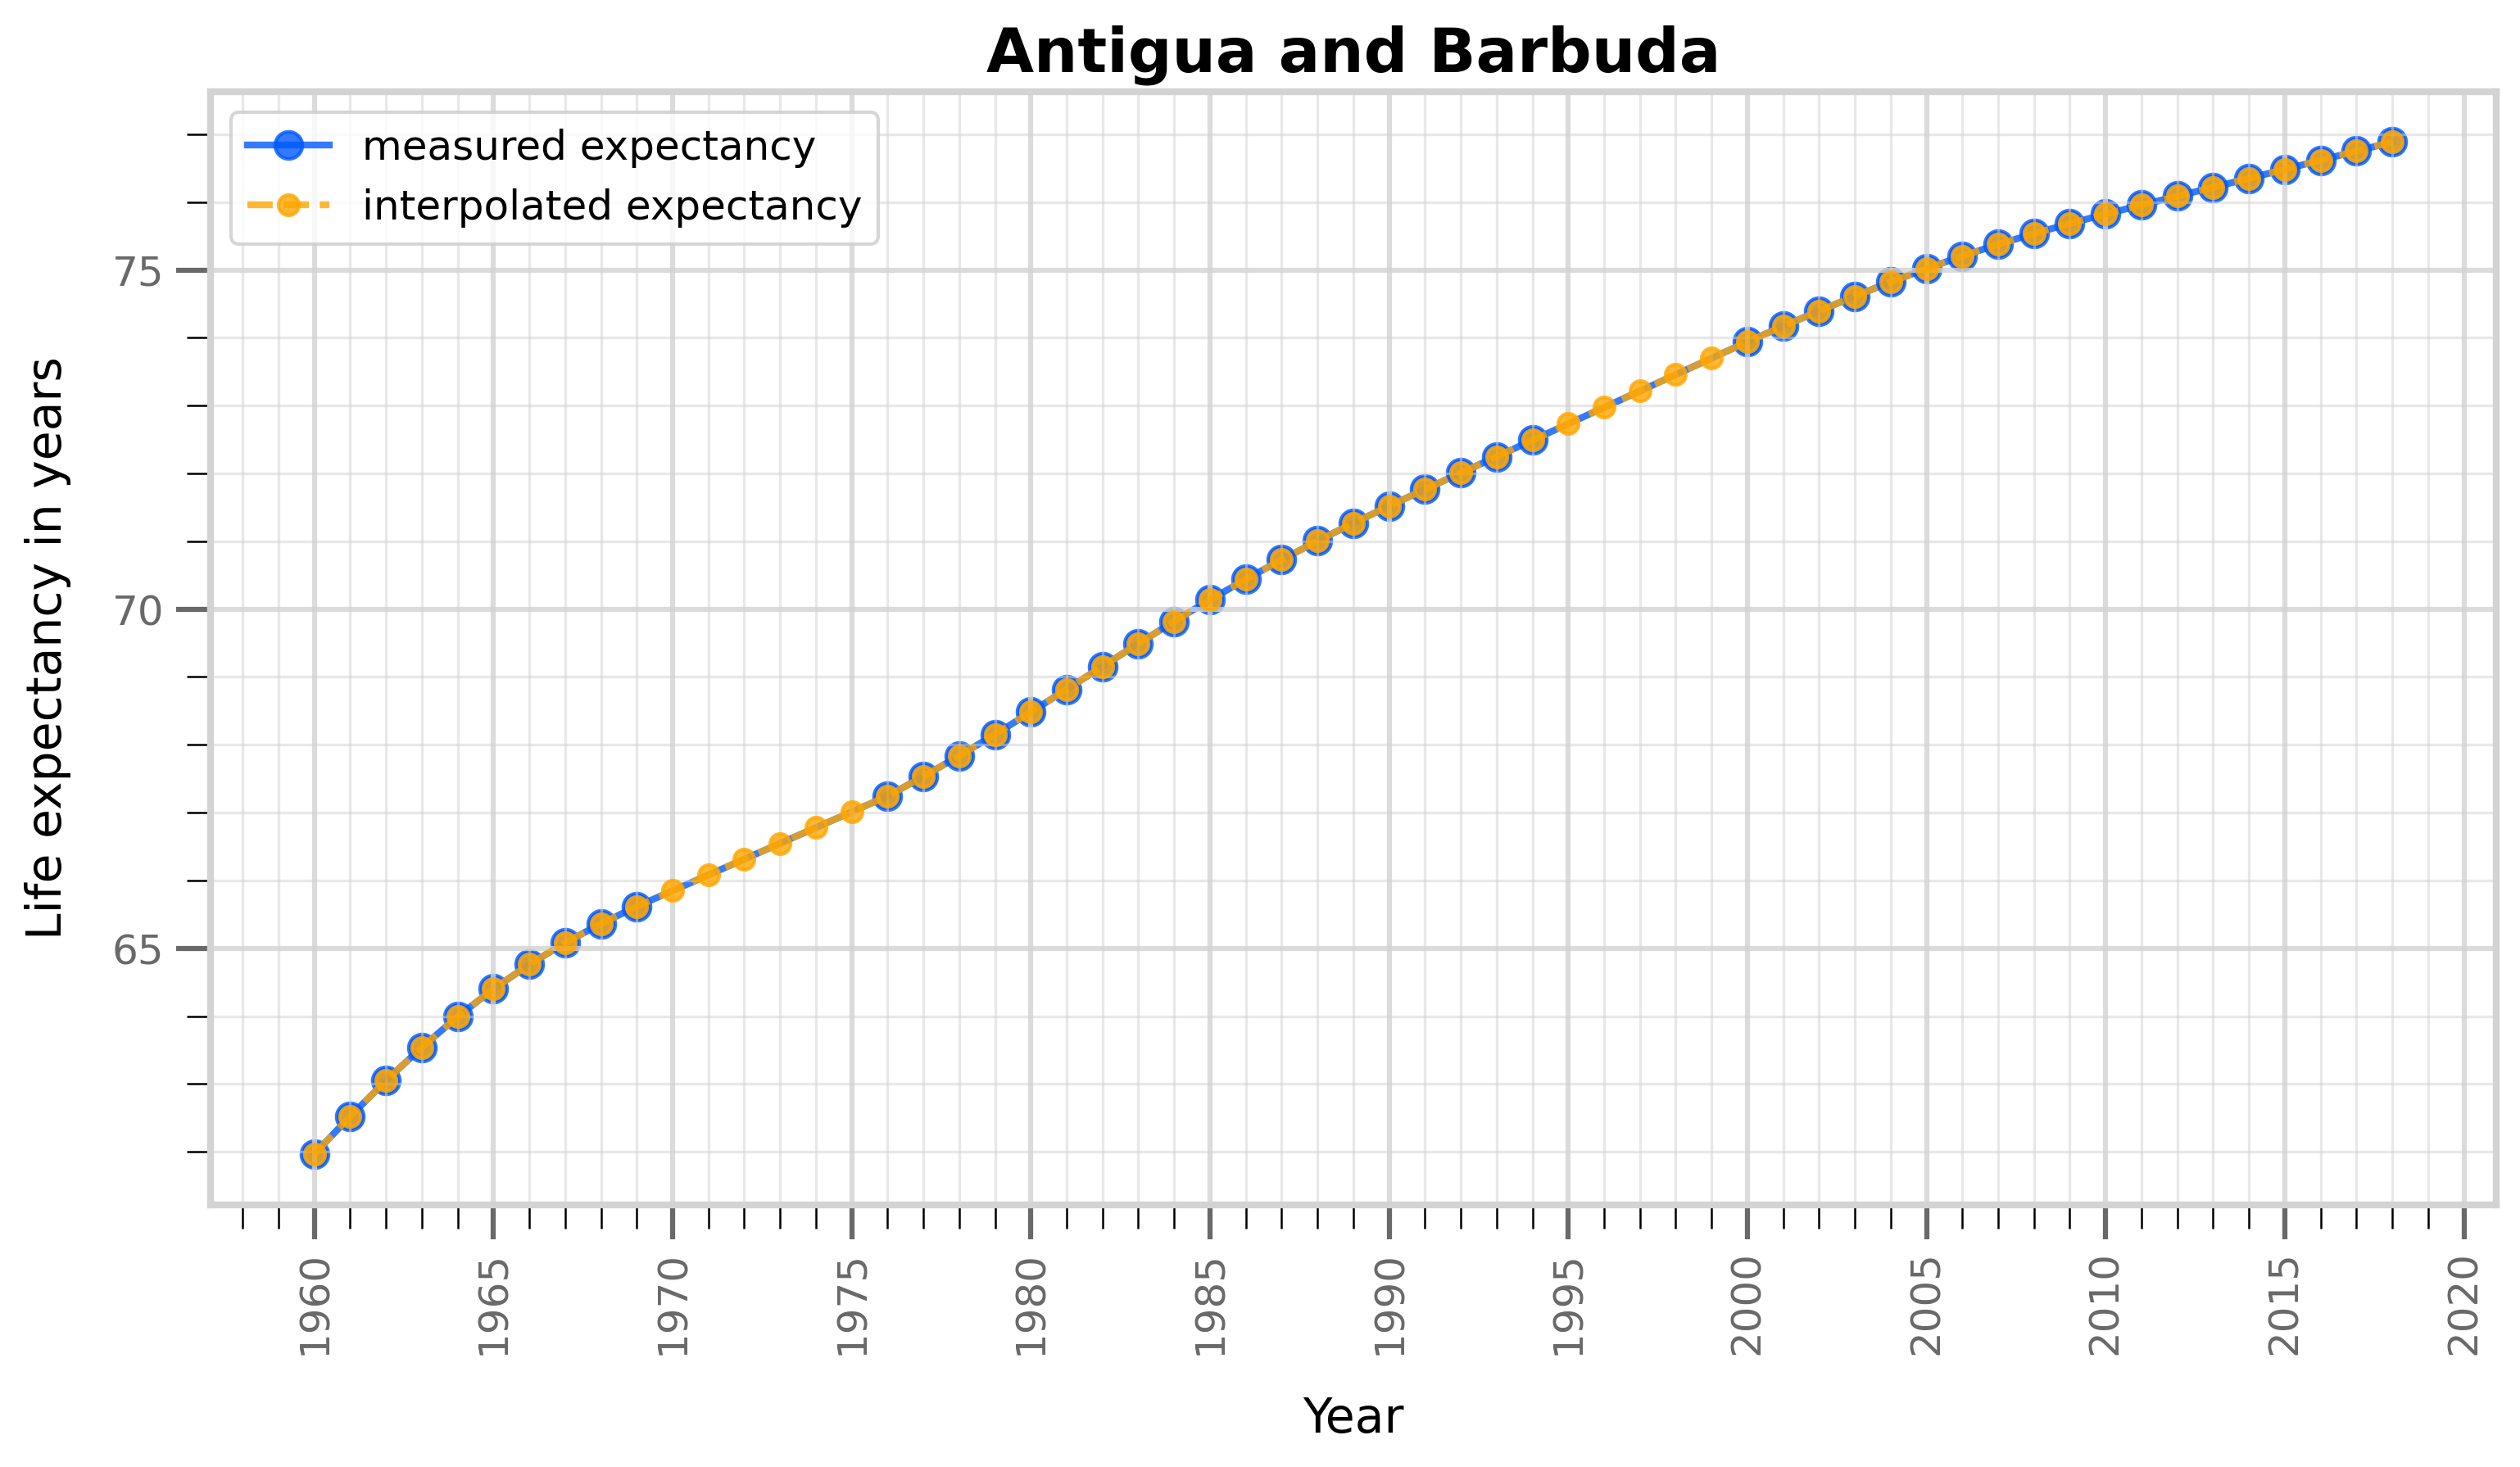

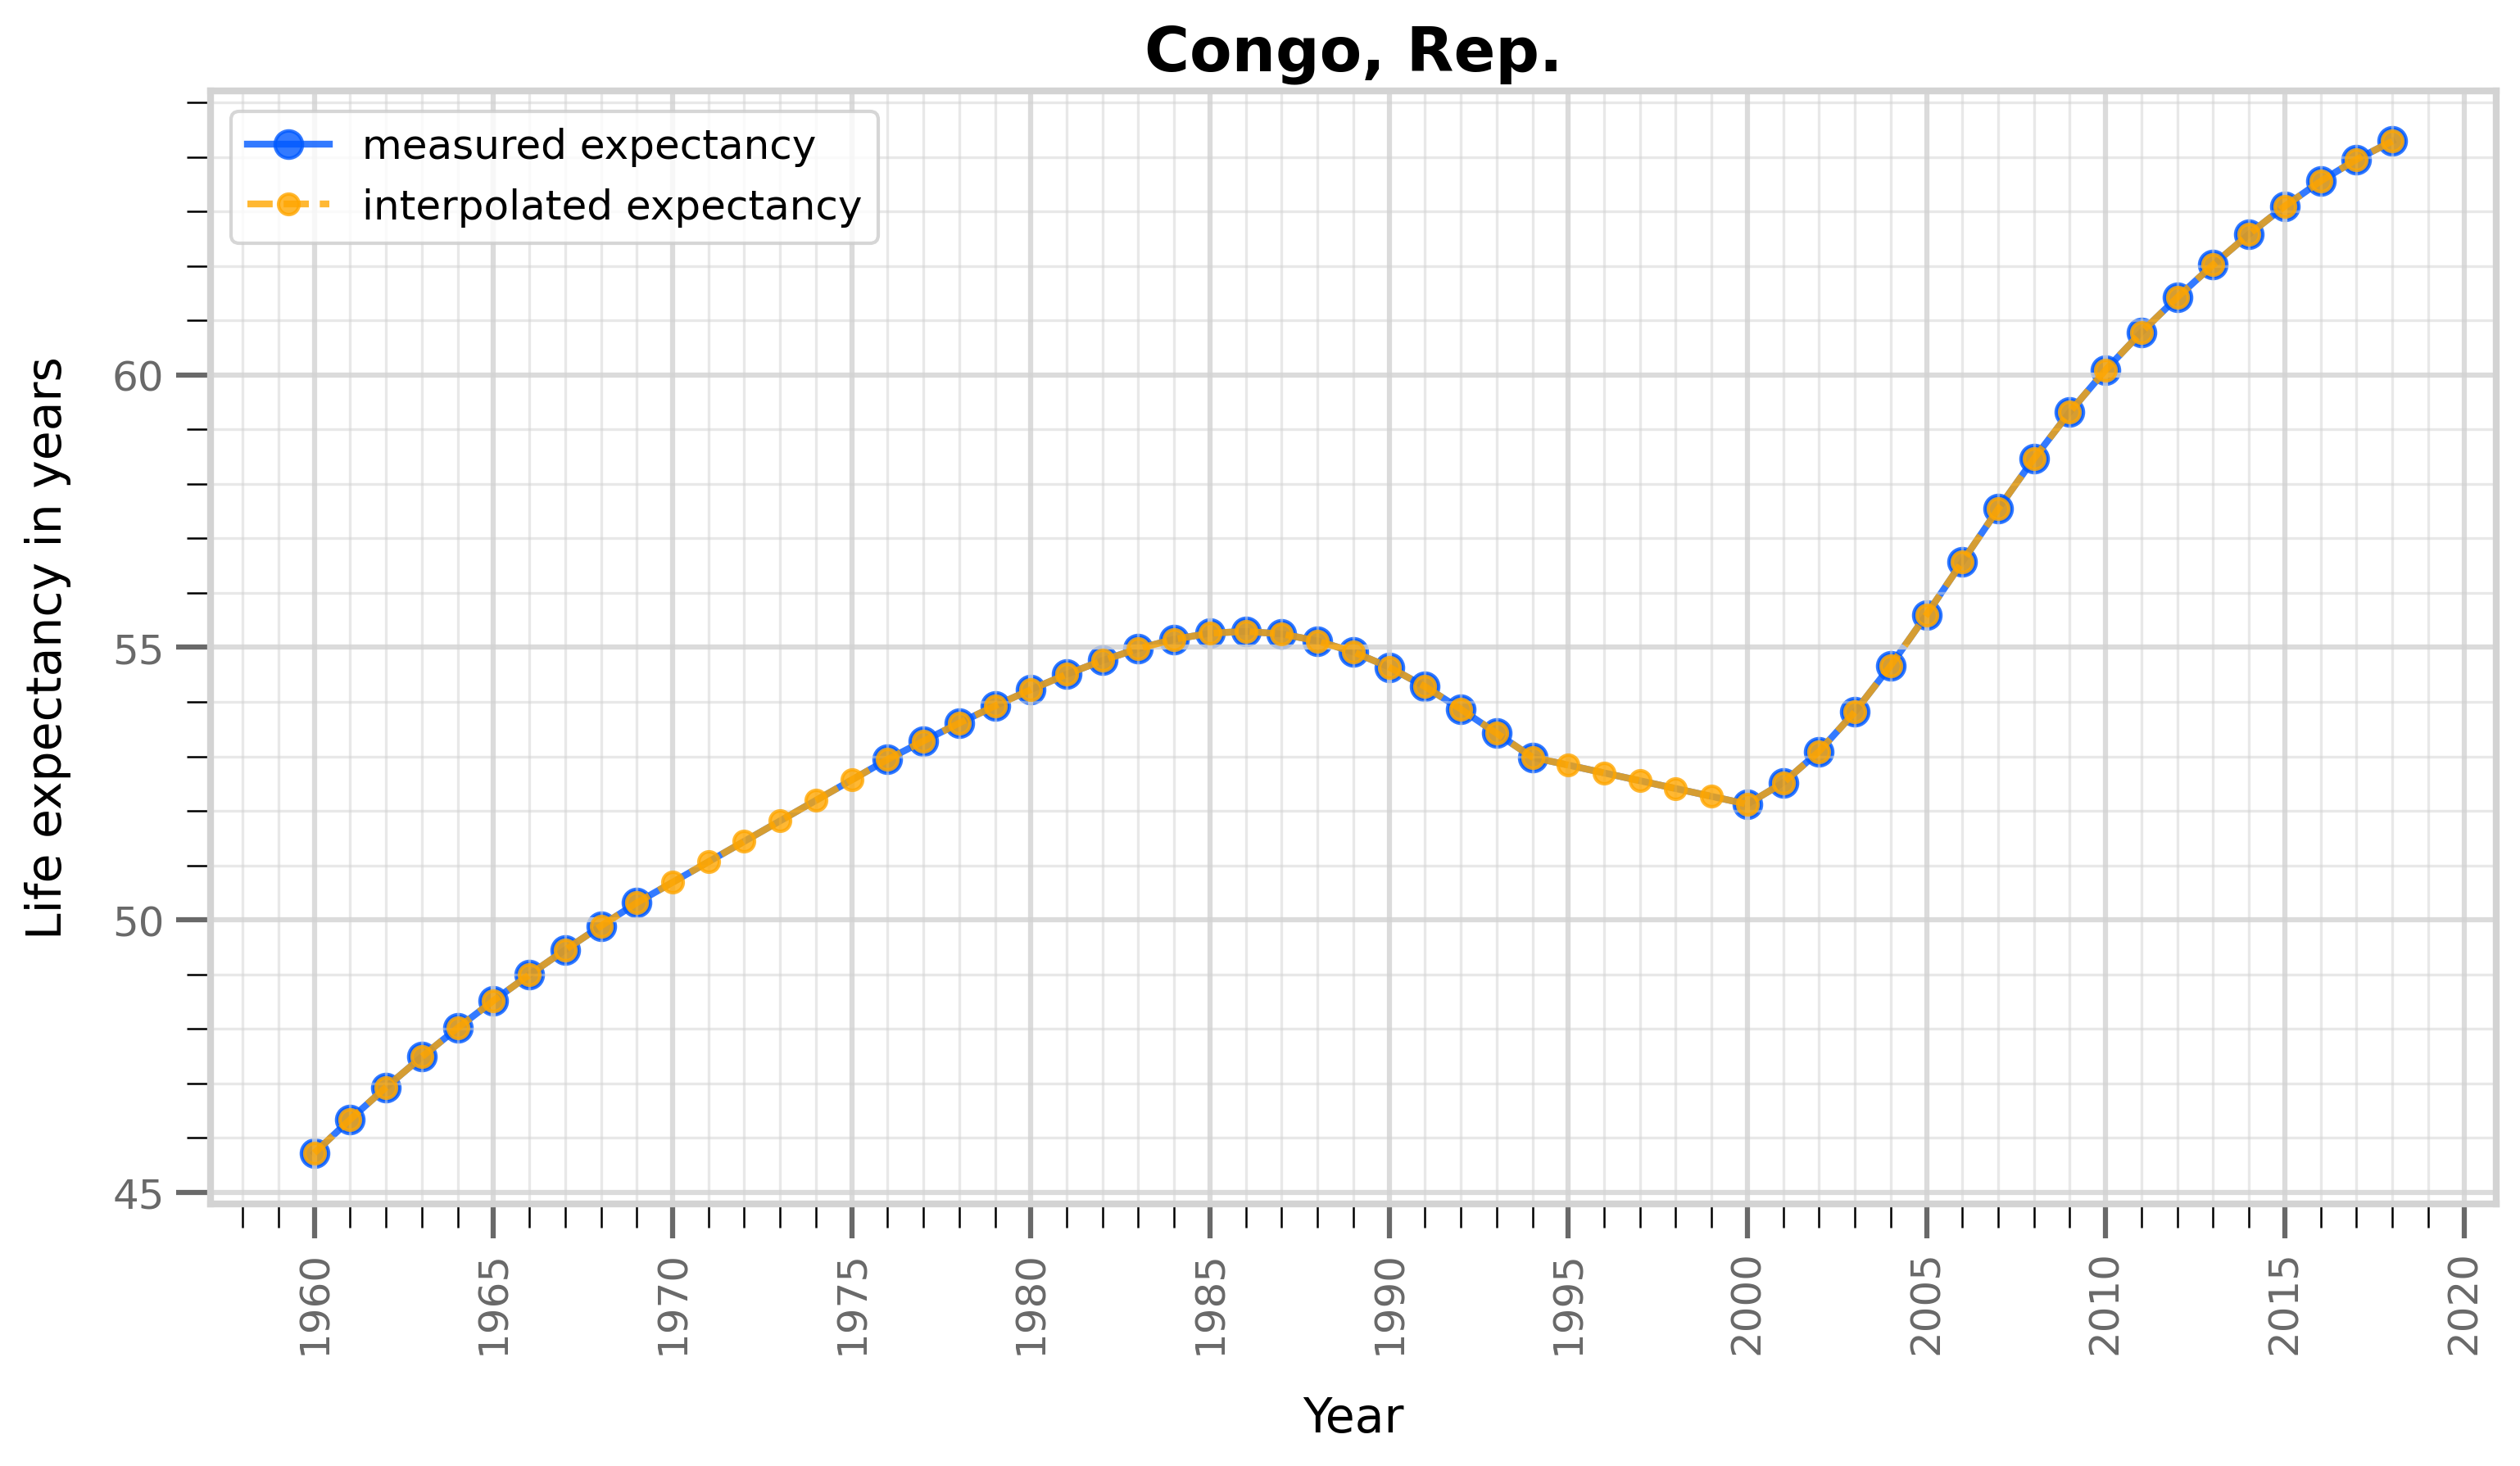

,Country Name,Missing Year,Interpolated Life Expectancy
0,Chile,1970,62.304143
1,Chile,1971,62.971286
2,Chile,1972,63.638429
3,Chile,1973,64.305571
4,Chile,1974,64.972714
5,Chile,1975,65.639857
6,Chile,1995,74.953500
7,Chile,1996,75.236000
8,Chile,1997,75.518500
9,Chile,1998,75.801000


In [81]:

def interpolated_value_lists(old_x_values, new_x_values, old_y_values_lists):
    check_list_argument(old_x_values, int, "x-values for which y-values already exist")
    check_list_argument(new_x_values, int, "x-values for which y-values do not exist yet")
    check_list_of_lists_argument(old_y_values_lists, float, "already existing y-values")

    interpolated_y_value_lists = []  # list of lists

    for old_y_values in old_y_values_lists:
        interpolation_function = interp1d(old_x_values, old_y_values)

        interpolated_y_value_lists.append(
            interpolation_function(new_x_values).tolist()
        )

    return interpolated_y_value_lists


missing_years = list(range(1970, 1976)) + list(range(1995, 2000))
all_years     = sorted(partial_years + missing_years)

# indices of year positions in lists of lists: {1960 : 0, 1961 : 1, ..., 2018 : 58}
year_indices  = dict((value, key) for (key, value) in enumerate(all_years))

country_column    = 'Country Name'
year_column       = 'Missing Year'
expectancy_column = 'Interpolated Life Expectancy'
report_dataframe  = \
    pd.DataFrame({country_column: [], year_column: [], expectancy_column: []})

interpolated_expectancy_lists = \
    interpolated_value_lists(partial_years, all_years, expectancy_lists)

for country_index in range(len(random_countries)):
    country = random_countries.iloc[country_index].loc["Country_Name"]

    # collect missing year data in report dataframe
    for year in missing_years:
        report_dataframe = report_dataframe.append({
            country_column   : country,
            year_column      : year,
            expectancy_column:
                interpolated_expectancy_lists[country_index][year_indices[year]]
        }, ignore_index=True)

    # plot interpolated expectancies over measured expectancies
    plot_two_overlain_data_sets(
        country, "Year", "Life expectancy in years",
        "measured expectancy", "interpolated expectancy",
        partial_years, expectancy_lists[country_index],
        all_years, interpolated_expectancy_lists[country_index]
    )

report_dataframe[year_column] = \
    report_dataframe[year_column].astype(int)  # convert years to integer

print("\n\n")
report_dataframe